# Employee Performance Analysis for INX Future Inc.

## Project Description

This data science project analyzes employee performance using the INX Future Inc. Employee dataset provided by the IABAC™ Machine Learning Repository. The dataset contains 1,200 records and 28 features, including 19 numerical and 9 categorical variables.

An extensive Exploratory Data Analysis (EDA) was conducted to understand patterns and relationships within the data. This included examining department-wise performance, identifying the top factors influencing employee outcomes, and exploring correlations among features.

Multiple machine learning models—Support Vector Machine (SVM), K-Nearest Neighbors (KNN), and Random Forest—were trained and evaluated. Based on performance metrics, particularly ROC-AUC, the Random Forest Classifier was selected as the final model due to its superior predictive ability.

A feature importance analysis revealed that Employee Environment Satisfaction and Employee Last Salary Hike Percentage were the strongest predictors of employee performance. These insights provide valuable guidance for organizations aiming to detect performance issues early and implement targeted interventions.

General Objective

- To analyze employee data and develop a predictive model capable of forecasting employee performance based on demographics, career experience, and job-related factors.

Specific Objectives

1. To clean, preprocess, and explore the dataset through appropriate visualization and statistical techniques.

2. To identify the key factors that significantly influence employee performance.

3. To analyze and interpret performance trends across different departments.

4. To develop, train, and evaluate machine learning models for predicting employee performance.

5. To provide actionable recommendations aimed at improving employee performance based on the analytical insights obtained.

In [490]:
# Importing the necessary libraries
import pandas as pd
import numpy as nup
import matplotlib.pyplot as plt
import seaborn as sns


In [491]:
import warnings

# suppressing specific waarnings
warnings.filterwarnings("ignore")

In [492]:
# Loading the dataset into a pandas dataframe

employee_data = pd.read_excel(r"C:\Users\hp\Desktop\DS_25\IABAC_Employee_Exam\INX_Future_Inc_Employee_Performance_CDS_Project2_Data_V1.8.xls")

# setting the display to default format to show all columns
pd.set_option('display.max_columns', None)

# Checking the first five rows of the dataset
print("The first five rows of the dataset:\n")
employee_data.head()


The first five rows of the dataset:



,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpHourlyRate,EmpJobInvolvement,EmpJobLevel,EmpJobSatisfaction,NumCompaniesWorked,OverTime,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
0,E1001000,32,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,10,3,4,55,3,2,4,1,No,12,4,10,2,2,10,7,0,8,No,3
1,E1001006,47,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,14,4,4,42,3,2,1,2,No,12,4,20,2,3,7,7,1,7,No,3
2,E1001007,40,Male,Life Sciences,Married,Sales,Sales Executive,Travel_Frequently,5,4,4,48,2,3,1,5,Yes,21,3,20,2,3,18,13,1,12,No,4
3,E1001009,41,Male,Human Resources,Divorced,Human Resources,Manager,Travel_Rarely,10,4,2,73,2,5,4,3,No,15,2,23,2,2,21,6,12,6,No,3
4,E1001010,60,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,16,4,1,84,3,2,1,8,No,14,4,10,1,3,2,2,2,2,No,3


In [493]:
# checking the last 5 rows of the dataset
print("The last five rows of the dataset:\n")
employee_data.tail()

The last five rows of the dataset:



,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpHourlyRate,EmpJobInvolvement,EmpJobLevel,EmpJobSatisfaction,NumCompaniesWorked,OverTime,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
1195,E100992,27,Female,Medical,Divorced,Sales,Sales Executive,Travel_Frequently,3,1,4,71,4,2,4,1,Yes,20,2,6,3,3,6,5,0,4,No,4
1196,E100993,37,Male,Life Sciences,Single,Development,Senior Developer,Travel_Rarely,10,2,4,80,4,1,4,3,No,17,1,4,2,3,1,0,0,0,No,3
1197,E100994,50,Male,Medical,Married,Development,Senior Developer,Travel_Rarely,28,1,4,74,4,1,3,1,Yes,11,3,20,3,3,20,8,3,8,No,3
1198,E100995,34,Female,Medical,Single,Data Science,Data Scientist,Travel_Rarely,9,3,4,46,2,3,2,1,No,14,2,9,3,4,8,7,7,7,No,3
1199,E100998,24,Female,Life Sciences,Single,Sales,Sales Executive,Travel_Rarely,3,2,1,65,3,2,3,9,No,14,1,4,3,3,2,2,2,0,Yes,2


In [494]:
# Understanding the structure of the dataset

print(f"The shape of employee_data is: \n{employee_data.shape}\n")
print("Employee_data has 1200 enties and 28 attributes.\n ")
print("*"* 100)

print("The information of the employee_data is:\n")
print( employee_data.info(),'\n')
print("The type of data available is int64 and object. \n")
print("*"* 100)

print(f"The statistical summary of the employee_data is: \n {employee_data.describe()}")


The shape of employee_data is: 
(1200, 28)

Employee_data has 1200 enties and 28 attributes.
 
****************************************************************************************************
The information of the employee_data is:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 28 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   EmpNumber                     1200 non-null   object
 1   Age                           1200 non-null   int64 
 2   Gender                        1200 non-null   object
 3   EducationBackground           1200 non-null   object
 4   MaritalStatus                 1200 non-null   object
 5   EmpDepartment                 1200 non-null   object
 6   EmpJobRole                    1200 non-null   object
 7   BusinessTravelFrequency       1200 non-null   object
 8   DistanceFromHome              1200 non-null   int64 
 9   EmpEducation

In [495]:
# Identifying the unique values in categorical columns

for col in employee_data.select_dtypes(include='object').columns:
    print(f"{col} has the following unique values: \n {employee_data[col].unique()}\n")
    print("*"*100, '\n')
   

# counting the frequency of each category in categorrical columns
for col in employee_data.select_dtypes(include='object').columns:
    print(f"The frequency in this category {col} is: \n {employee_data[col].value_counts()}\n")
    print("*"*100)


EmpNumber has the following unique values: 
 ['E1001000' 'E1001006' 'E1001007' ... 'E100994' 'E100995' 'E100998']

**************************************************************************************************** 

Gender has the following unique values: 
 ['Male' 'Female']

**************************************************************************************************** 

EducationBackground has the following unique values: 
 ['Marketing' 'Life Sciences' 'Human Resources' 'Medical' 'Other'
 'Technical Degree']

**************************************************************************************************** 

MaritalStatus has the following unique values: 
 ['Single' 'Married' 'Divorced']

**************************************************************************************************** 

EmpDepartment has the following unique values: 
 ['Sales' 'Human Resources' 'Development' 'Data Science'
 'Research & Development' 'Finance']

*********************************************

In [496]:
# Checking for any missing values in the employee_data
print(employee_data.isnull().sum(),'\n')

print("Employee_data has no missing values.")

EmpNumber                       0
Age                             0
Gender                          0
EducationBackground             0
MaritalStatus                   0
EmpDepartment                   0
EmpJobRole                      0
BusinessTravelFrequency         0
DistanceFromHome                0
EmpEducationLevel               0
EmpEnvironmentSatisfaction      0
EmpHourlyRate                   0
EmpJobInvolvement               0
EmpJobLevel                     0
EmpJobSatisfaction              0
NumCompaniesWorked              0
OverTime                        0
EmpLastSalaryHikePercent        0
EmpRelationshipSatisfaction     0
TotalWorkExperienceInYears      0
TrainingTimesLastYear           0
EmpWorkLifeBalance              0
ExperienceYearsAtThisCompany    0
ExperienceYearsInCurrentRole    0
YearsSinceLastPromotion         0
YearsWithCurrManager            0
Attrition                       0
PerformanceRating               0
dtype: int64 

Employee_data has no missing valu

DEPARTMENT WISE PERFORMANCE

Plots to be used:

1. Violinplot- This shows how quantitative values are distributed within various categorical groups for easy comparison.

2. Countplots- This visualize the frequency counts of categorical observations using bar representations.

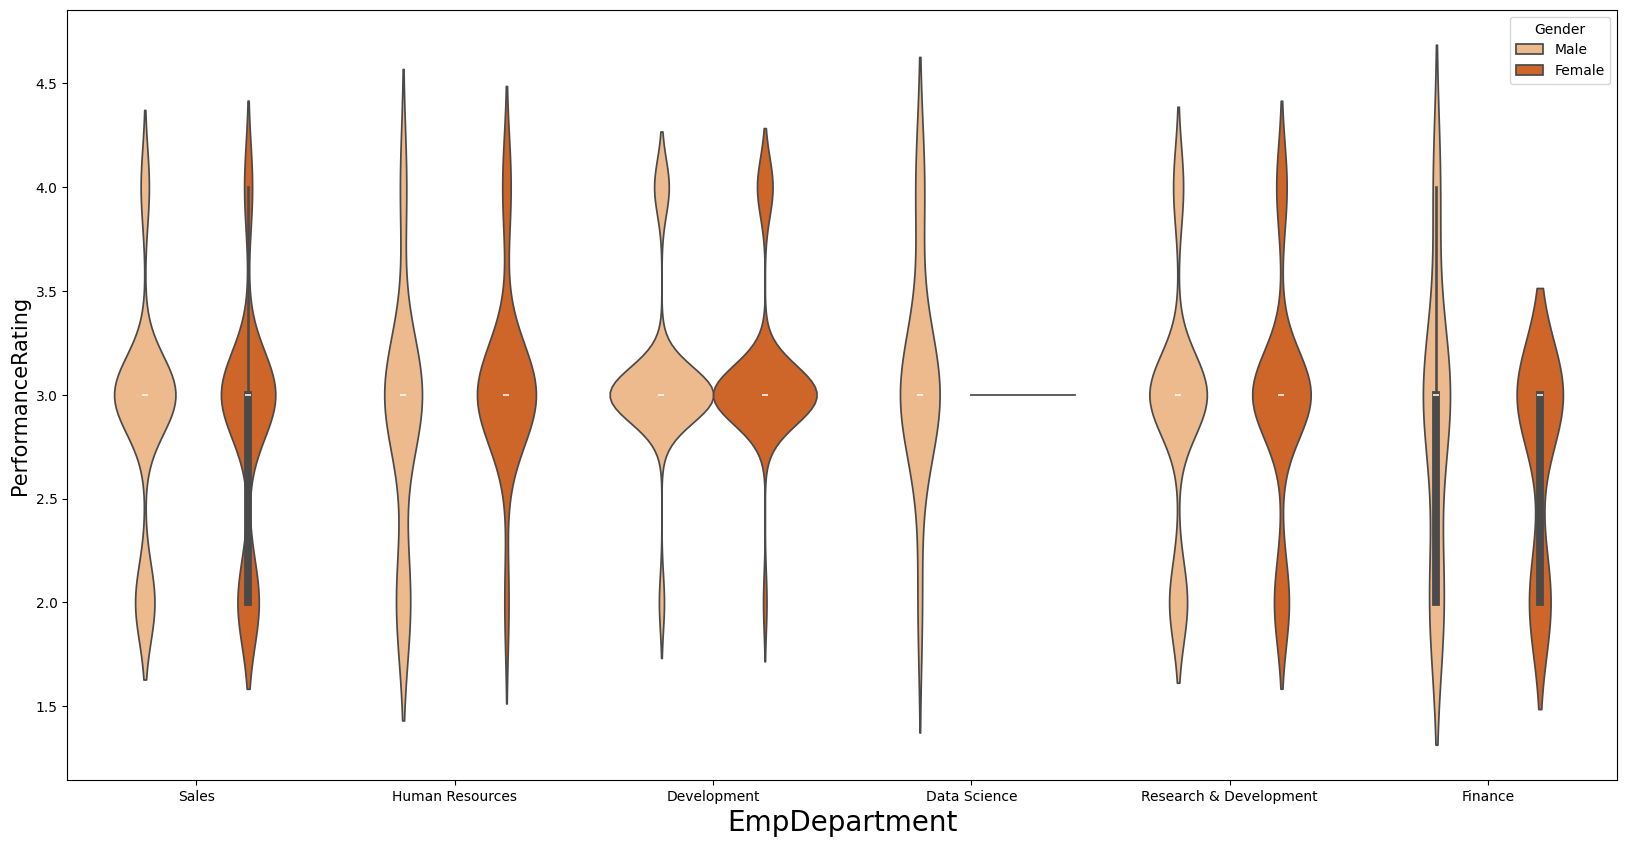

In [497]:
# plotting
plt.figure(figsize=(20,10))
sns.violinplot(data= employee_data,x='EmpDepartment',y='PerformanceRating',hue=employee_data.Gender,palette=sns.color_palette('Oranges', n_colors=2))
plt.xlabel('EmpDepartment',fontsize=20)
plt.ylabel('PerformanceRating',fontsize=15)
plt.show()

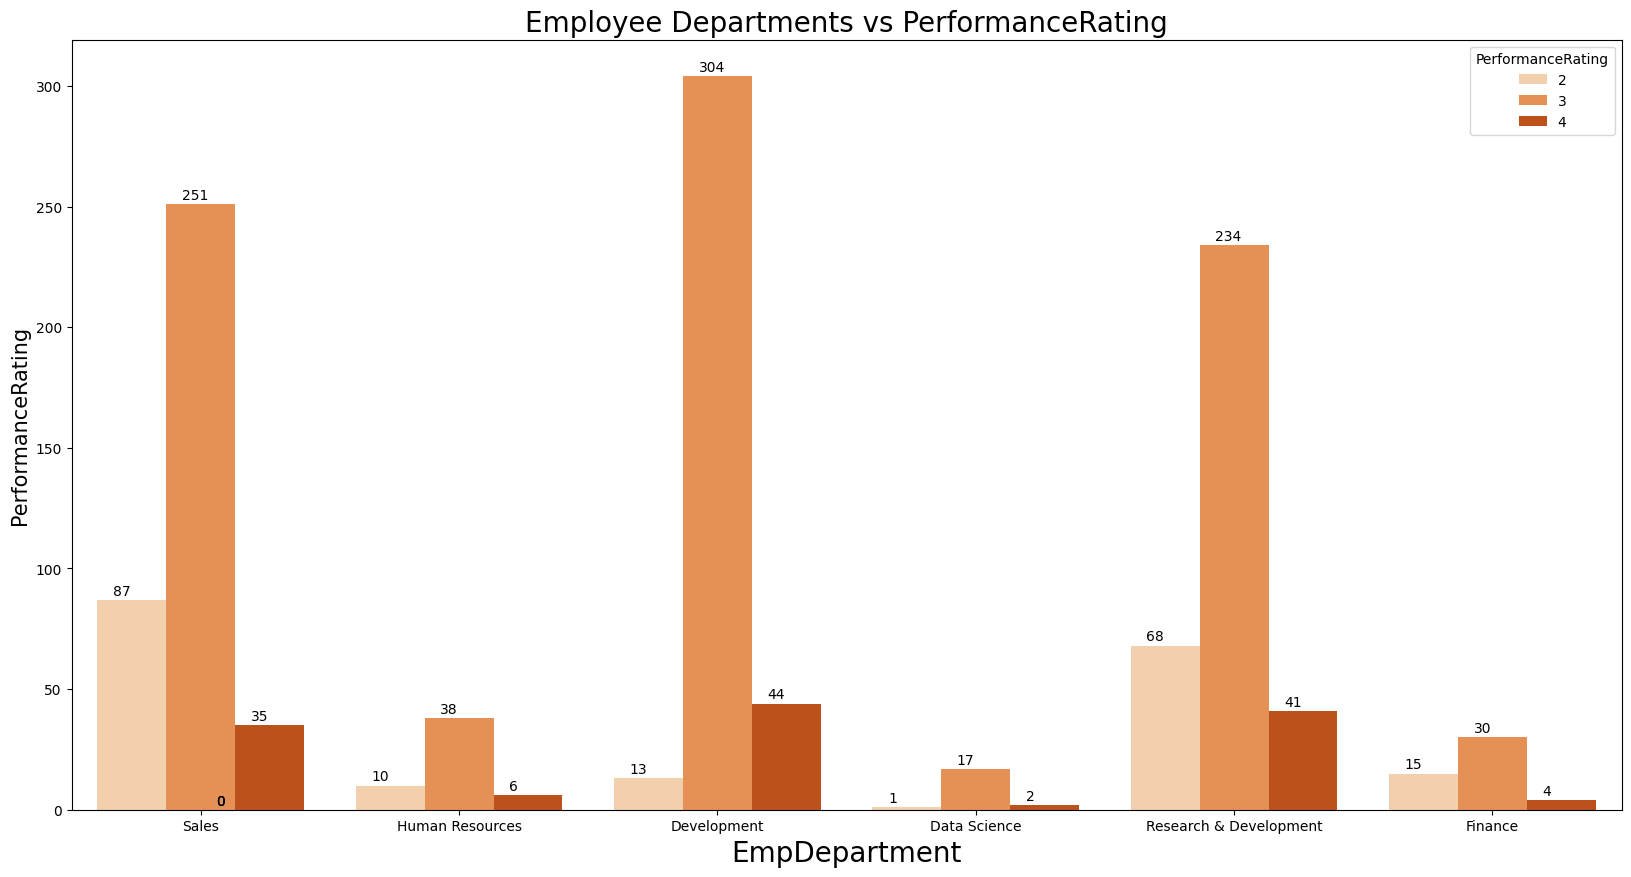

In [498]:
#plotting countplots of the Employee Departments
fig,ax =plt.subplots(1,1, figsize=(20,10))
sns.countplot(data=employee_data, x='EmpDepartment',hue=employee_data.PerformanceRating,palette= sns.color_palette('Oranges',3))
for i in ax.patches:
    ax.annotate('{:.0f}'.format(i.get_height()), (i.get_x()+0.06, i.get_height()+2))
plt.title('Employee Departments vs PerformanceRating',fontsize=20)
plt.xlabel('EmpDepartment',fontsize=20)
plt.ylabel('PerformanceRating',fontsize=15)
plt.show()

Insights from Department wise performance

Sales Department:
The countplot is dominant at Rating 3, strong Rating 4 presence, minimal low performers. Violin plot shows wide performance distribution with healthy density across both genders. Therefore, sales has high-performing team with diverse skill levels, shows both consistency (peak at 3) and capability for excellence with good representation at 4.

Human Resources:
The count plot has strong concentration at Rating 3 and moderate Rating 4. Violin plots has a tight, concentrated distribution around median performance for both genders. This suggests consistent, reliable performers, team delivers stable output with limited performance variation.

Development:
This has a heavy concentration at Rating 3 and  good Rating 4 representation as per the countplot. It also has a balanced distribution with good spread across performance levels for both genders. This indicates strong technical team with quality output, maintains high standards while accommodating some performance diversity

Data Science:
This demonstrates the lowest overall performance among all departments, with greater representation in lower rating tiers and less concentration in top performance categories compared to other departments.

Research & Development:
This has strong peak at Rating 3 and healthy Rating 4 presence seen. Violoin plots is concentrated around high-performance ratings with limited outliers. Therefore it is focused high-achievers,team maintains excellent standards with minimal performance gaps

Finance:
Has a clear dominance of Rating 3 and  good secondary Rating 4 presence seen. The violin plot shows consistent, predictable performance distribution. This suggests a stable, dependable team  that delivers reliable results with consistent quality.

Visaulization Section:

- Understanding the distribution of the attributes and how they relate to each other.


1. Univariate Analysis

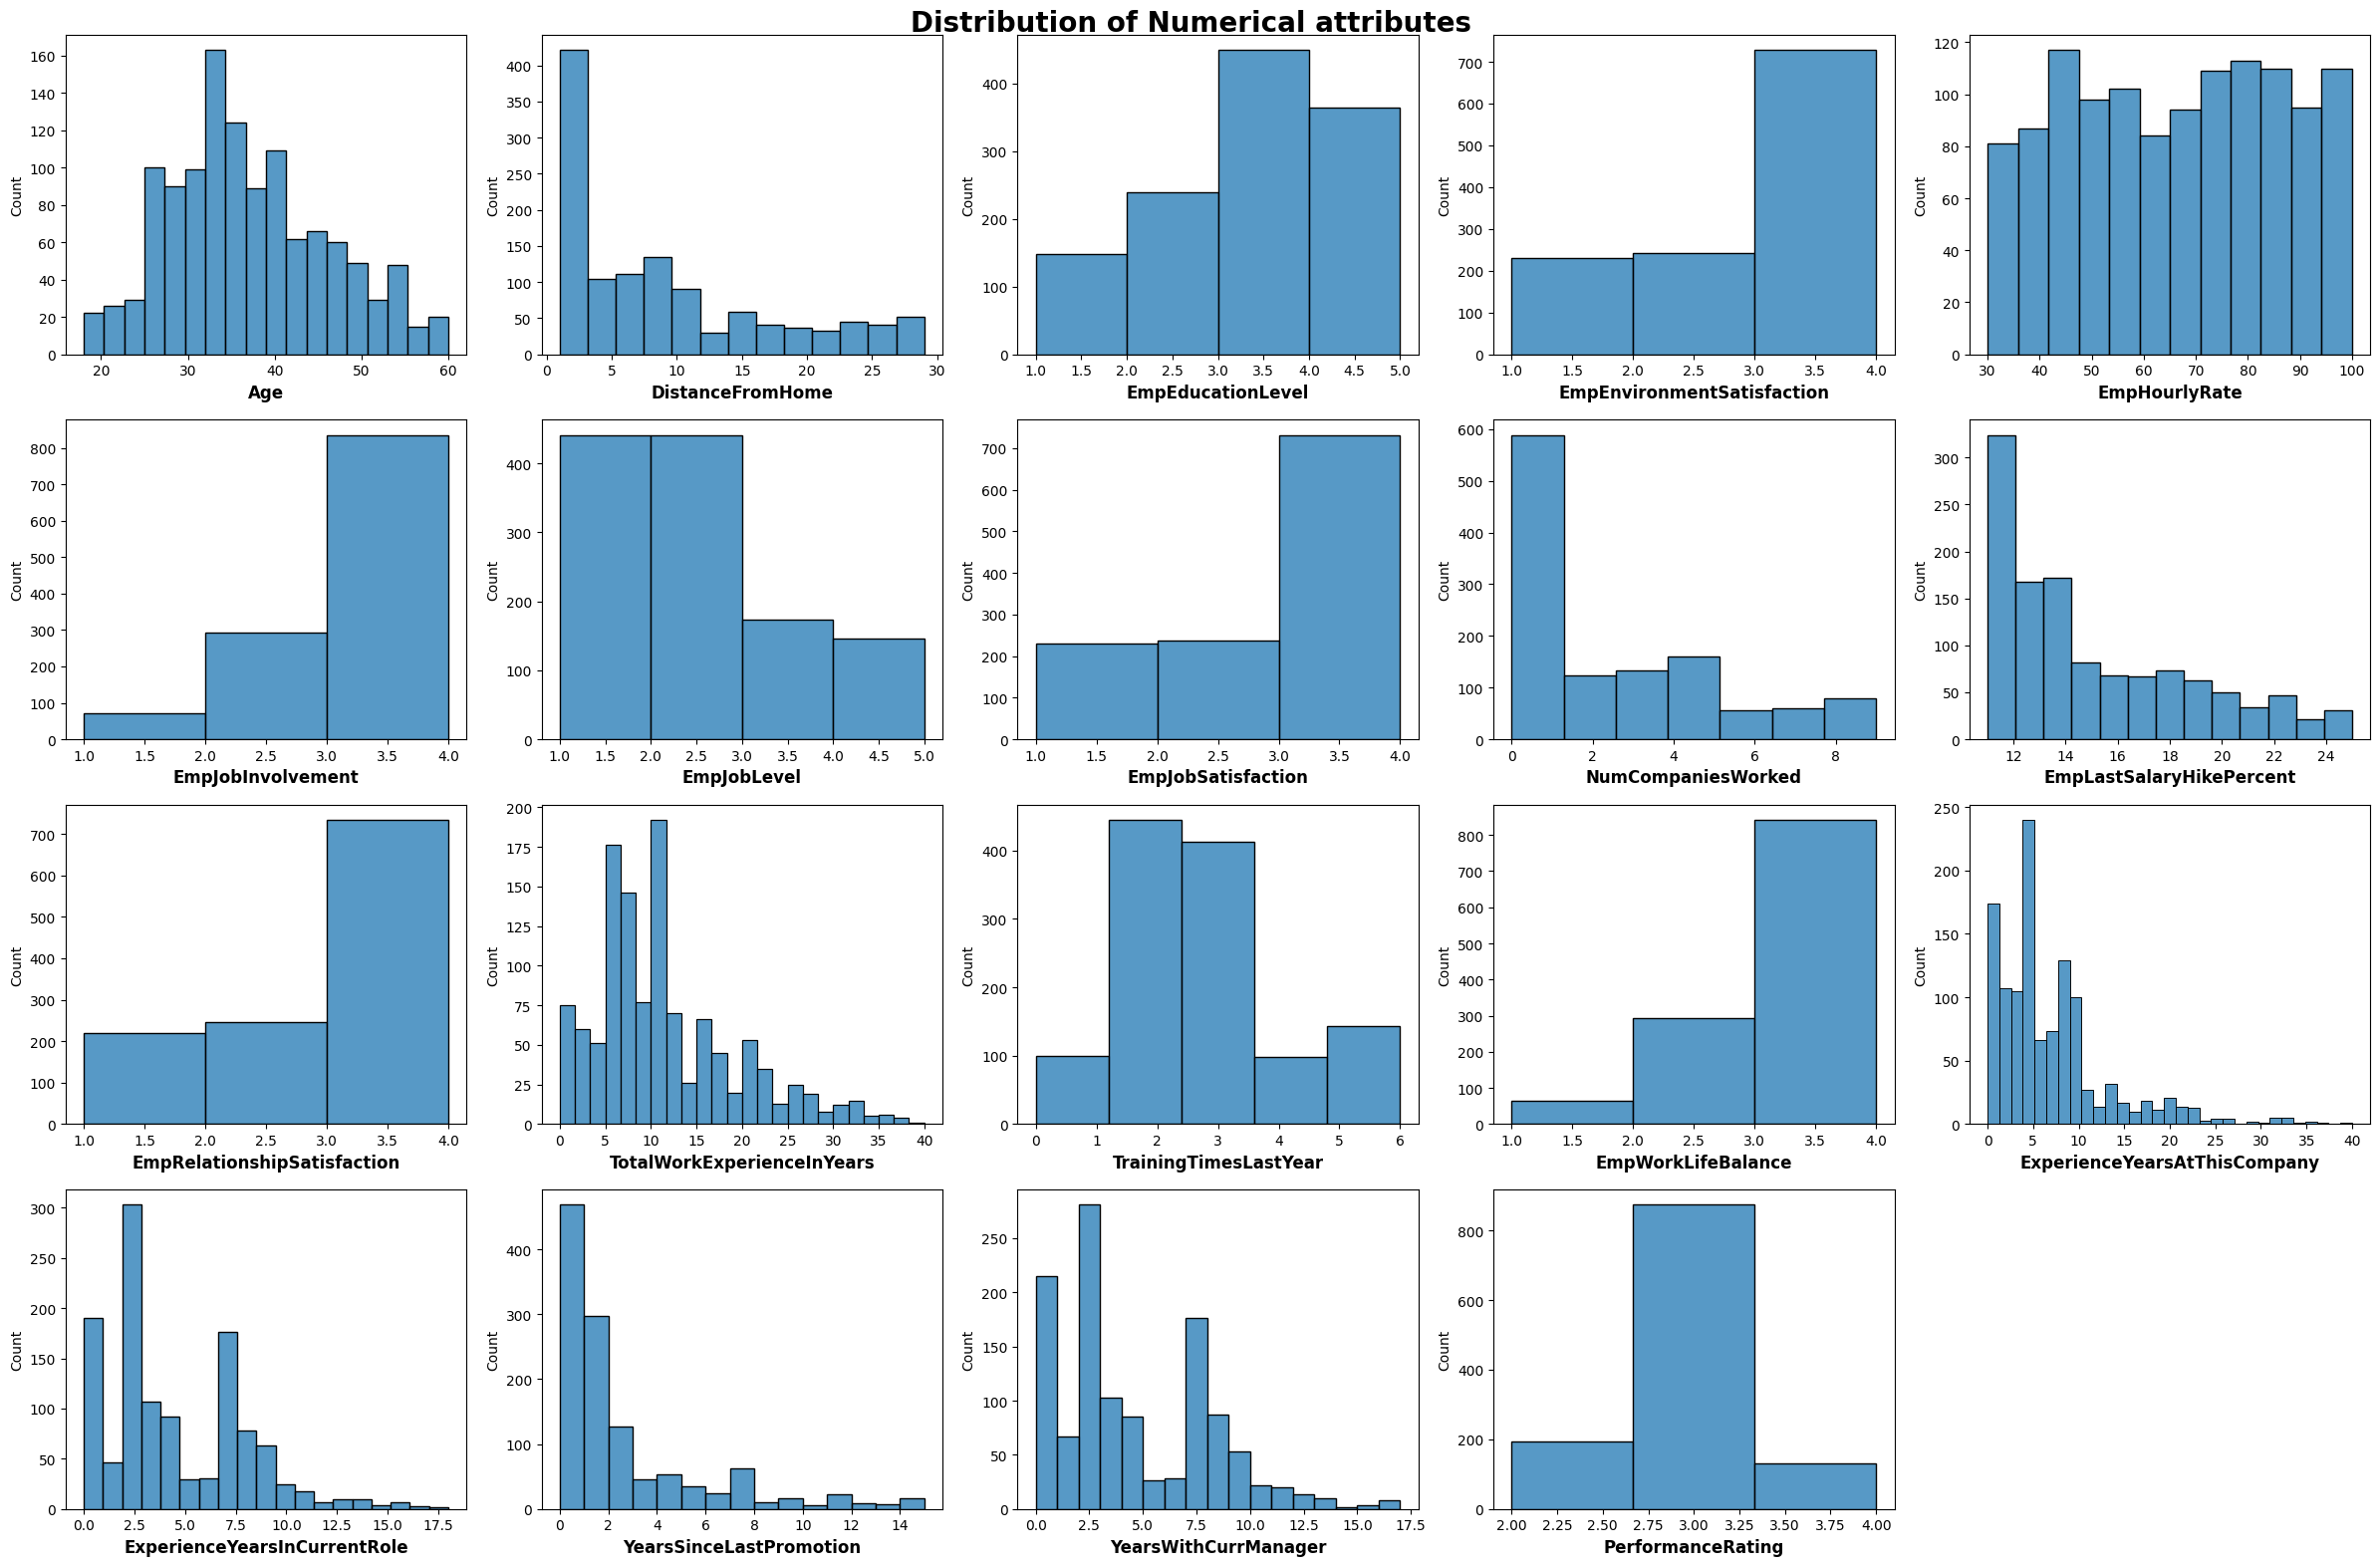

In [499]:
# Distribution analysis of numerical variables

fig,ax = plt.subplots(4,5, figsize= (24,16))
fig.suptitle("Distribution of Numerical attributes", fontsize =20, weight='bold')
sns.histplot(data= employee_data, x= 'Age', ax= ax[0,0])
sns.histplot(data=employee_data, x = 'DistanceFromHome', ax = ax[0,1])
sns.histplot(data=employee_data, x= 'EmpEducationLevel', ax= ax[0,2], bins=4)
sns.histplot(data=employee_data, x= 'EmpEnvironmentSatisfaction',ax= ax[0,3], bins=3)
sns.histplot(data=employee_data, x= 'EmpHourlyRate',ax=ax[0,4])
sns.histplot(data=employee_data, x= 'EmpJobInvolvement', ax=ax[1,0], bins=3)
sns.histplot(data=employee_data, x= 'EmpJobLevel', ax=ax[1,1], bins=4)
sns.histplot(data=employee_data, x= 'EmpJobSatisfaction',ax=ax[1,2], bins=3)
sns.histplot(data=employee_data, x= 'NumCompaniesWorked', ax=ax[1,3], bins=7)
sns.histplot(data=employee_data, x= 'EmpLastSalaryHikePercent', ax=ax[1,4])
sns.histplot(data=employee_data, x= 'EmpRelationshipSatisfaction', ax=ax[2,0], bins=3)
sns.histplot(data=employee_data, x= 'TotalWorkExperienceInYears', ax=ax[2,1])
sns.histplot(data=employee_data, x= 'TrainingTimesLastYear', ax=ax[2,2], bins=5)
sns.histplot(data=employee_data, x= 'EmpWorkLifeBalance', ax=ax[2,3], bins=3)
sns.histplot(data=employee_data, x= 'ExperienceYearsAtThisCompany', ax=ax[2,4])
sns.histplot(data=employee_data, x= 'ExperienceYearsInCurrentRole', ax=ax[3,0], bins=19)
sns.histplot(data=employee_data, x= 'YearsSinceLastPromotion', ax=ax[3,1], bins=15)
sns.histplot(data=employee_data, x= 'YearsWithCurrManager', ax=ax[3,2], bins=17)
sns.histplot(data=employee_data, x= 'PerformanceRating', ax=ax[3,3], bins=3)

# creating a list of numerial variables
labels = ['Age', 'DistanceFromHome', 'EmpEducationLevel', 'EmpEnvironmentSatisfaction', 'EmpHourlyRate',
                  'EmpJobInvolvement', 'EmpJobLevel', 'EmpJobSatisfaction', 'NumCompaniesWorked',
                  'EmpLastSalaryHikePercent', 'EmpRelationshipSatisfaction', 'TotalWorkExperienceInYears',
                  'TrainingTimesLastYear', 'EmpWorkLifeBalance', 'ExperienceYearsAtThisCompany',
                  'ExperienceYearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager',
                  'PerformanceRating']

# converting the 2D array into 1D array for easy iteration
ax=ax.flatten()


# setting the fontsize of the labels
for i,label in enumerate(labels):
    ax[i].set_xlabel(label,fontsize=12, weight='bold')

# Turning off the empty axis
ax[-1].axis('off')



plt.tight_layout()
plt.show()

Distribution analysis:

- The distribution plots show that the variables Age, DistanceFromHome, EmpJobLevel, NumCompaniesWorked, EmpLastSalaryHikePercent, TotalWorkExperienceInYears, ExperienceYearsAtThisCompany, ExperienceYearsInCurrentRole, YearsSinceLastPromotion, and YearsWithCurrManager are right-skewed, indicating that most employees fall on the lower end of these values with a few higher extreme values.

- In contrast, the variables EmpEducationLevel, EmpEnvironmentSatisfaction, EmpJobInvolvement, EmpJobSatisfaction, EmpRelationshipSatisfaction, and EmpWorkLifeBalance appear to be left-skewed, meaning the majority of employees score on the higher end of these satisfaction or rating metrics.

- Lastly, EmpHourlyRate, TrainingTimeLastYear, and PerformanceRating display approximately symmetrical distributions, suggesting that their values are more evenly spread around the center.

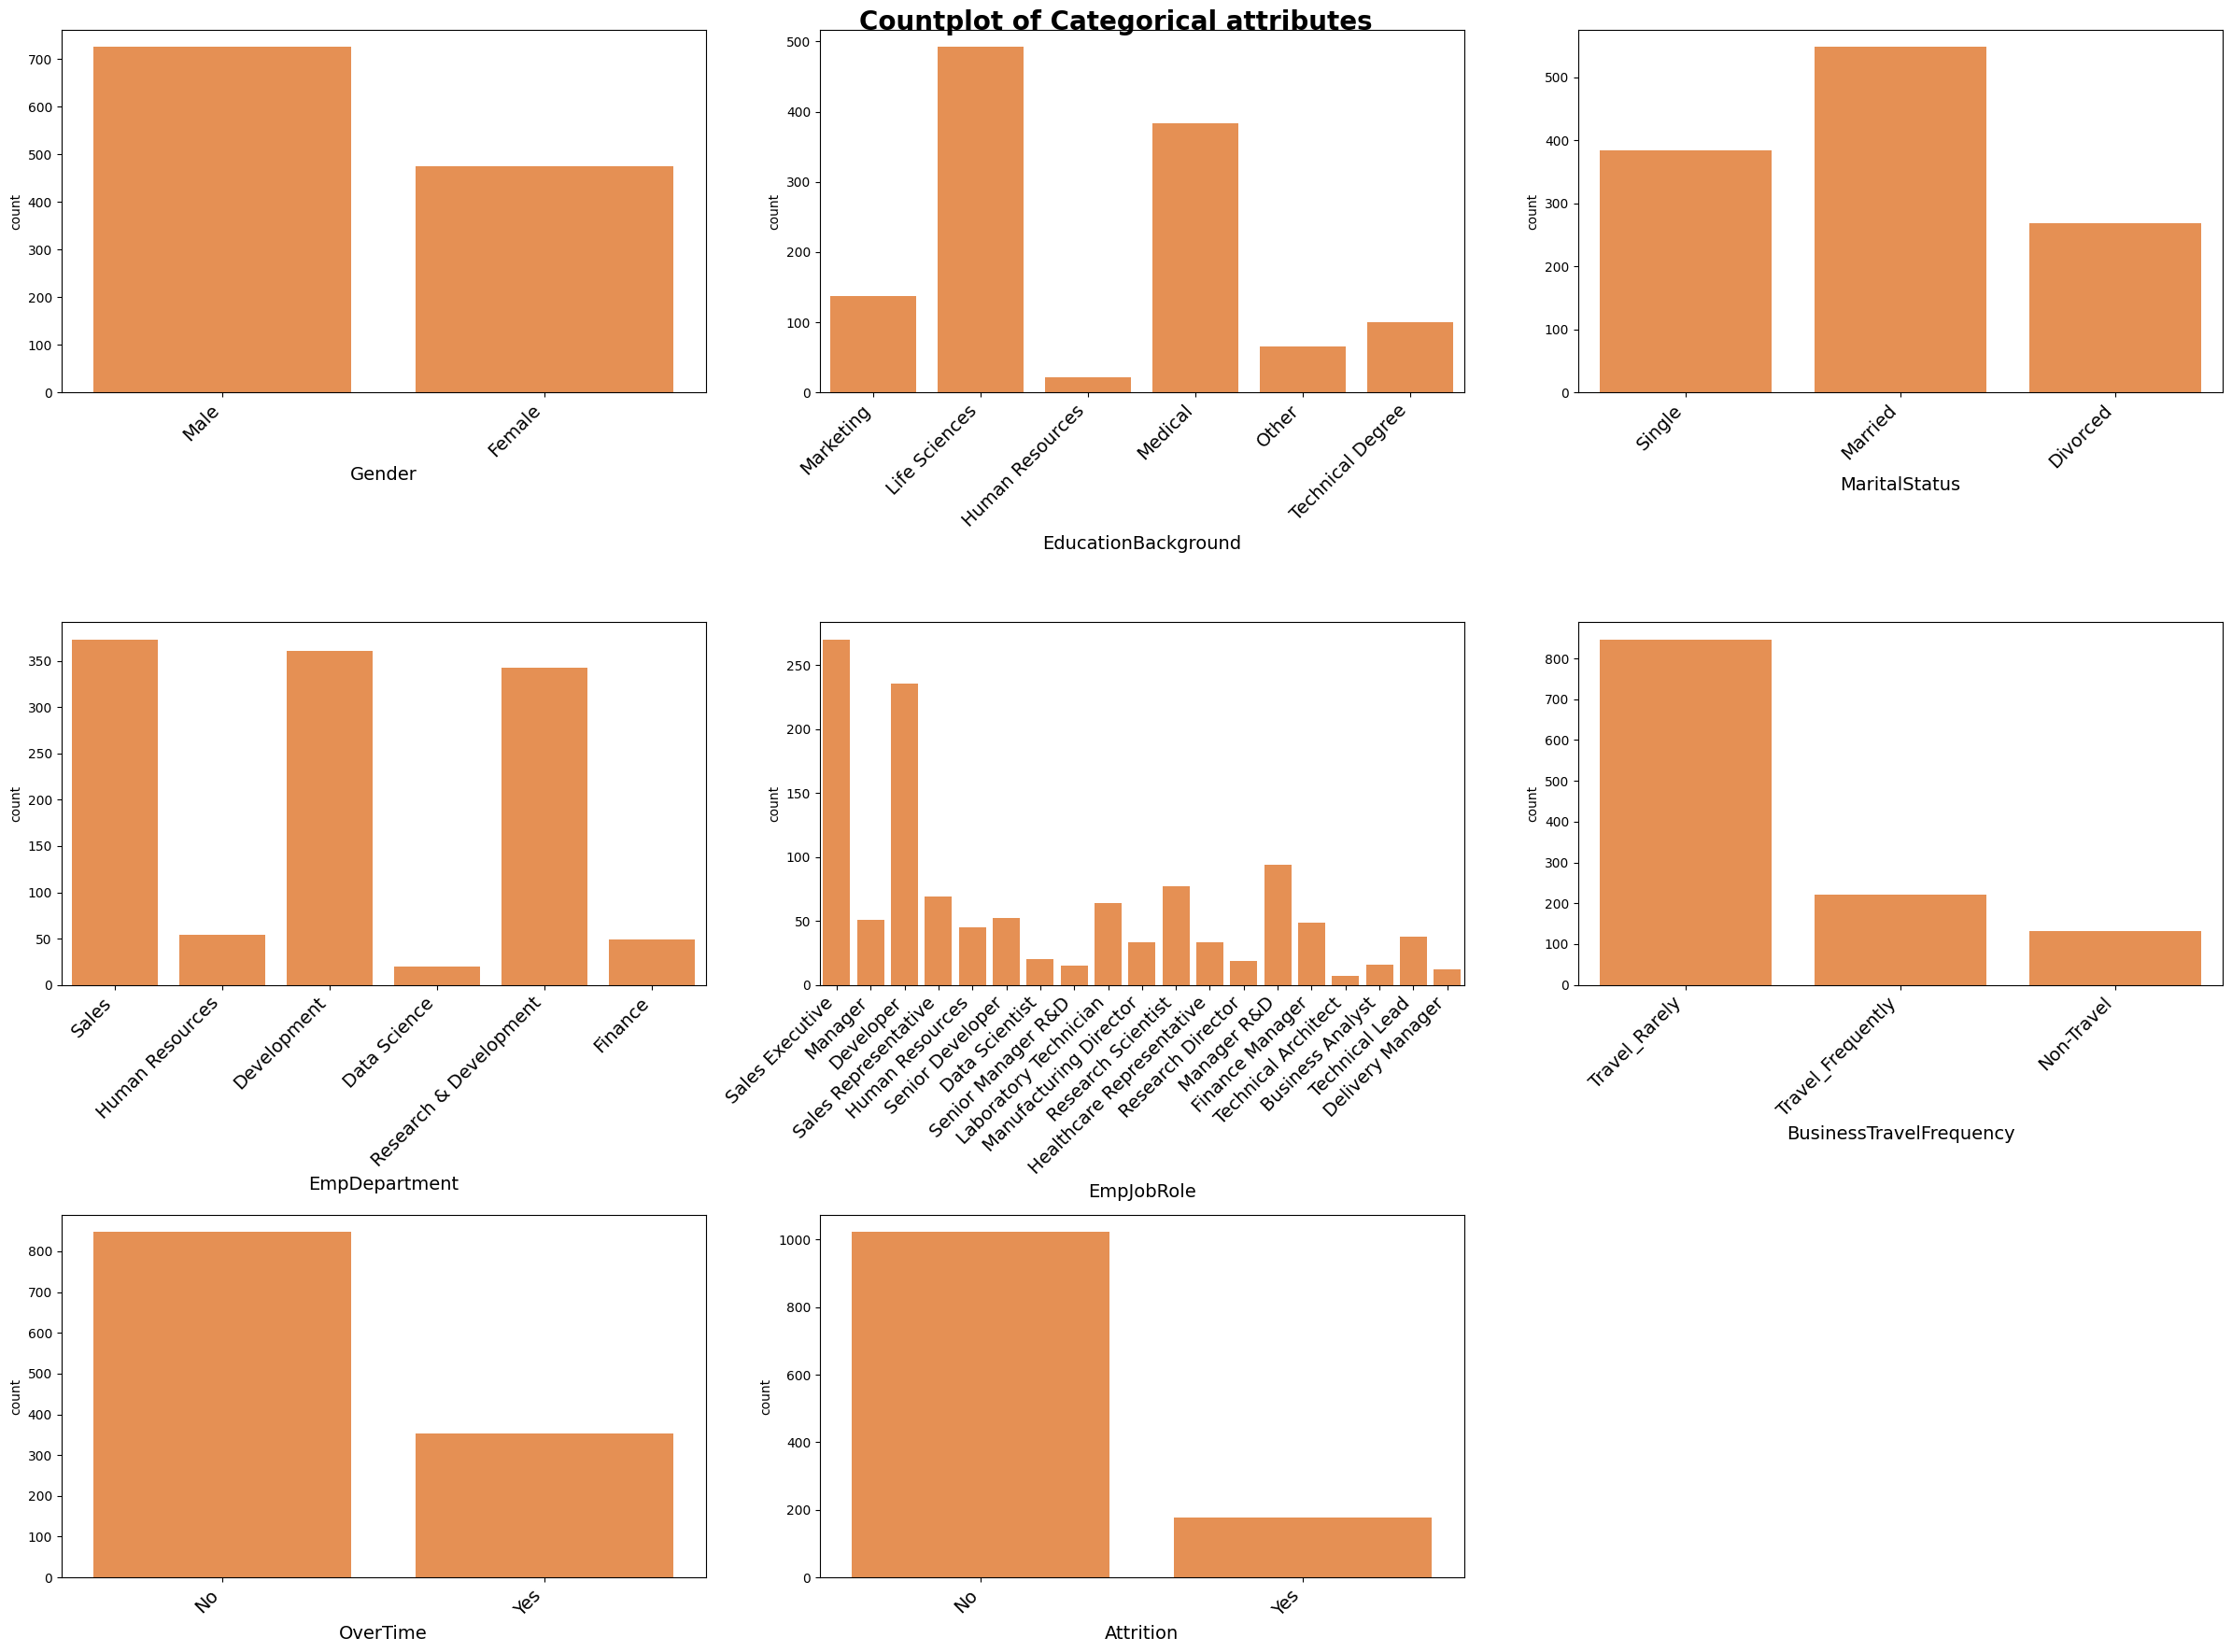

In [500]:
# Countplot analysis for the categorical variables
fig,axes = plt.subplots(3,3, figsize=(24,18))
fig.suptitle("Countplot of Categorical attributes", fontsize = 20, weight ='bold')
sns.countplot(data= employee_data, x= 'Gender', ax=axes[0,0], palette= sns.color_palette("Oranges", n_colors=1))
sns.countplot(data= employee_data, x= 'EducationBackground', ax=axes[0,1], palette= sns.color_palette('Oranges', n_colors=1))
sns.countplot(data= employee_data, x= 'MaritalStatus', ax= axes[0,2], palette= sns.color_palette('Oranges', n_colors=1))
sns.countplot(data= employee_data, x = 'EmpDepartment', ax=axes[1,0], palette= sns.color_palette('Oranges', n_colors=1))
sns.countplot(data = employee_data, x = 'EmpJobRole', ax=axes[1,1], palette= sns.color_palette('Oranges', n_colors=1))
sns.countplot(data= employee_data, x = 'BusinessTravelFrequency',ax=axes[1,2], palette= sns.color_palette('Oranges', n_colors=1))
sns.countplot(data = employee_data, x = 'OverTime', ax=axes[2,0], palette= sns.color_palette('Oranges', n_colors=1))
sns.countplot(data= employee_data, x= 'Attrition', ax=axes[2,1], palette= sns.color_palette('Oranges', n_colors=1))

# creating a list of the x labels
x_labels_cat = ['Gender', 'EducationBackground', 'MaritalStatus', 'EmpDepartment', 'EmpJobRole',
                'BusinessTravelFrequency', 'OverTime', 'Attrition']

#flattening the axes 2D array into 1D array for easy iteration
axes= axes.flatten()

# setting the fontsize of xlabels and  rotating xtick labels at an angle for better visibility
for i,label in enumerate(x_labels_cat):
    axes[i].set_xlabel(label, fontsize= 14)
    axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45, ha='right', fontsize= 14)

# Turnng off the empty subplot
axes[-1].axis('off')

plt.tight_layout()
plt.show()

Countplot interpreation:

Gender Distribution:
The dataset shows that male employees form the largest proportion, with females representing a smaller share of the workforce.

Educational Background:
Most employees have an educational background in Life Sciences. Fields such as Medical and Marketing appear at moderate levels, while Human Resources, Technical Degrees, and Other categories have the lowest representation.

Marital Status:
A majority of employees are married, whereas single and divorced employees appear slightly less frequent in comparison.

Department Distribution:
The Sales, Development, and Research & Development departments have the highest concentration of employees, indicating key functional areas in the organization.

Business Travel Frequency:
Most employees travel rarely, suggesting that travel is not a major requirement for many roles.

Overtime and Attrition:
A large proportion of employees do not work overtime, and similarly, most employees are not likely to leave the company, as indicated by low attrition counts.

2. Bivariate Analysis

- Understanding how numerical and categorical features relate with performance rating(target).

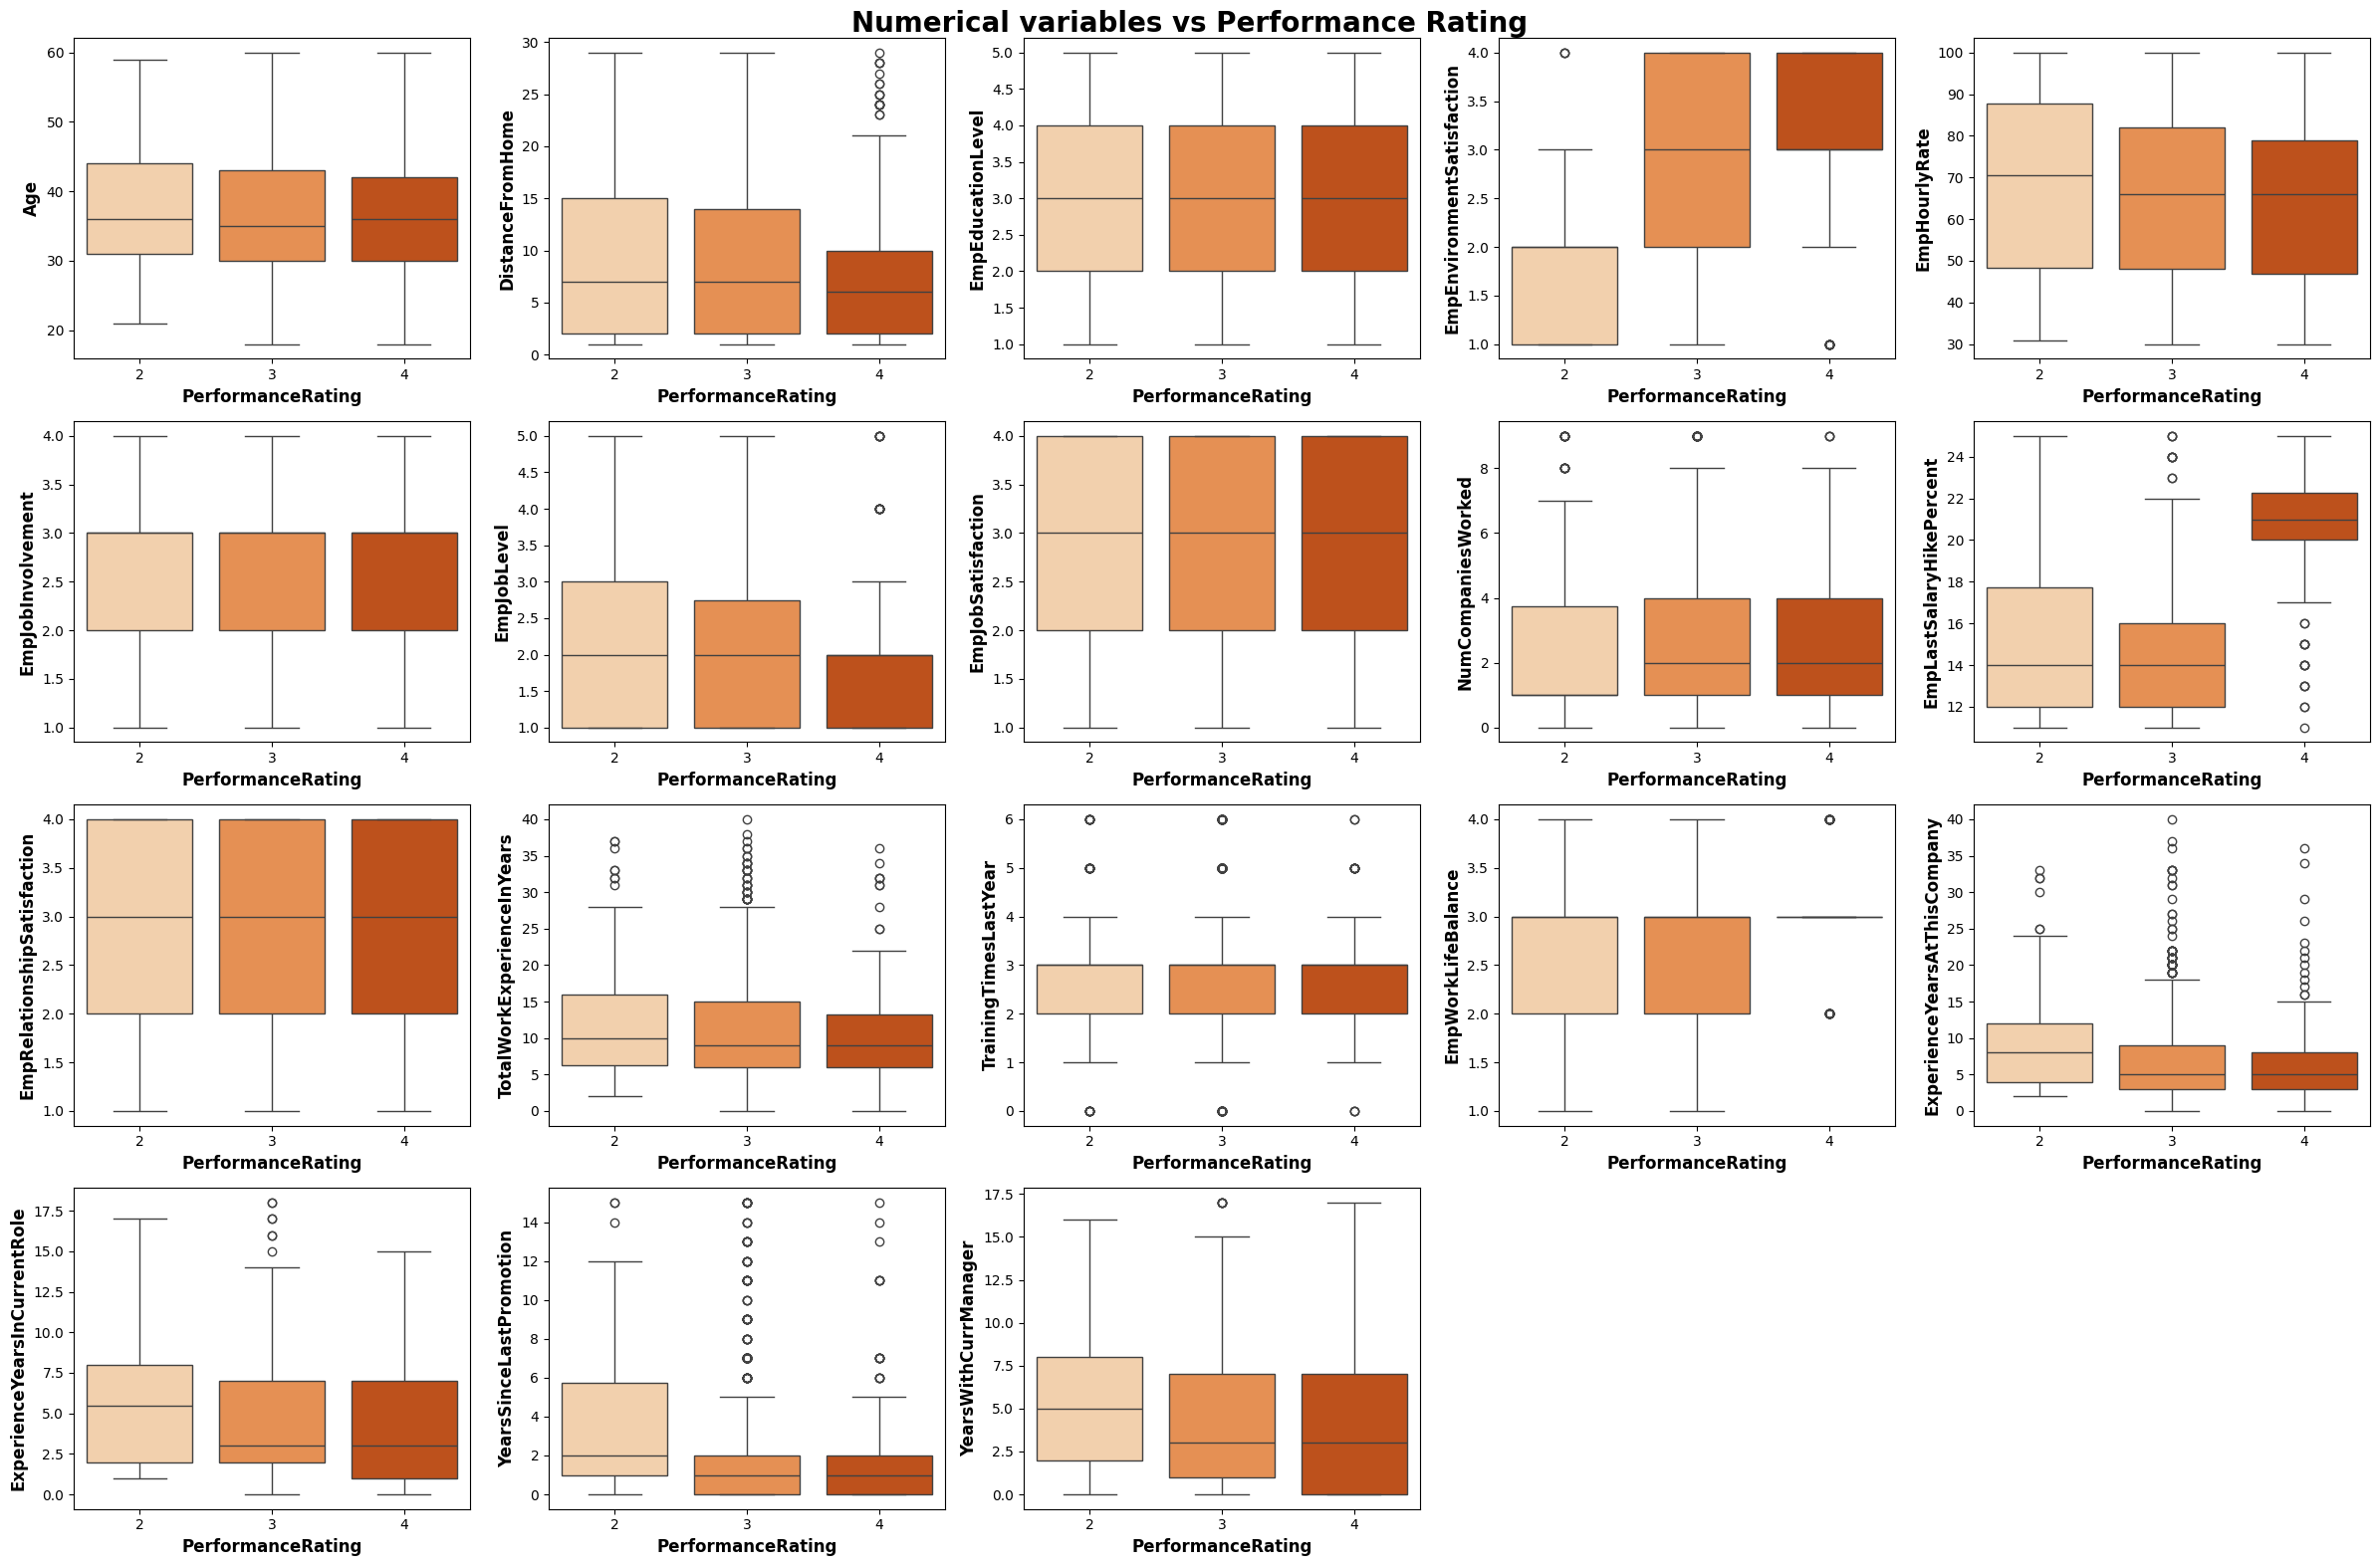

In [501]:
# Numerical vs Performance rating analysis

fig,ax= plt.subplots(4,5, figsize=(24,16))
fig.suptitle("Numerical variables vs Performance Rating", fontsize=20, weight='bold')
sns.boxplot(data=employee_data, x= 'PerformanceRating',y= 'Age', ax=ax[0,0], palette= sns.color_palette('Oranges',3))
sns.boxplot(data=employee_data, x= 'PerformanceRating', y= 'DistanceFromHome', ax=ax[0,1], palette= sns.color_palette('Oranges',3))
sns.boxplot(data=employee_data, x= 'PerformanceRating', y= 'EmpEducationLevel', ax=ax[0,2], palette= sns.color_palette('Oranges',3))
sns.boxplot(data=employee_data, x= 'PerformanceRating', y= 'EmpEnvironmentSatisfaction', ax=ax[0,3], palette= sns.color_palette('Oranges',3))
sns.boxplot(data=employee_data, x= 'PerformanceRating', y= 'EmpHourlyRate', ax=ax[0,4], palette= sns.color_palette('Oranges',3))
sns.boxplot(data=employee_data, x= 'PerformanceRating', y= 'EmpJobInvolvement', ax=ax[1,0], palette= sns.color_palette('Oranges',3))
sns.boxplot(data=employee_data, x= 'PerformanceRating', y= 'EmpJobLevel', ax=ax[1,1], palette= sns.color_palette('Oranges',3))
sns.boxplot(data=employee_data, x= 'PerformanceRating', y= 'EmpJobSatisfaction', ax=ax[1,2], palette= sns.color_palette('Oranges',3))
sns.boxplot(data=employee_data, x= 'PerformanceRating', y= 'NumCompaniesWorked', ax=ax[1,3], palette= sns.color_palette('Oranges',3))
sns.boxplot(data=employee_data, x= 'PerformanceRating', y= 'EmpLastSalaryHikePercent', ax=ax[1,4], palette= sns.color_palette('Oranges',3))
sns.boxplot(data=employee_data, x= 'PerformanceRating', y= 'EmpRelationshipSatisfaction', ax=ax[2,0], palette= sns.color_palette('Oranges',3))
sns.boxplot(data=employee_data, x= 'PerformanceRating', y= 'TotalWorkExperienceInYears', ax=ax[2,1], palette= sns.color_palette('Oranges',3))
sns.boxplot(data=employee_data, x= 'PerformanceRating', y= 'TrainingTimesLastYear', ax=ax[2,2], palette= sns.color_palette('Oranges',3))
sns.boxplot(data=employee_data, x= 'PerformanceRating', y= 'EmpWorkLifeBalance', ax=ax[2,3], palette= sns.color_palette('Oranges',3))
sns.boxplot(data=employee_data, x= 'PerformanceRating', y= 'ExperienceYearsAtThisCompany', ax=ax[2,4], palette= sns.color_palette('Oranges',3))
sns.boxplot(data=employee_data, x= 'PerformanceRating', y= 'ExperienceYearsInCurrentRole', ax=ax[3,0], palette= sns.color_palette('Oranges',3))
sns.boxplot(data=employee_data, x= 'PerformanceRating', y= 'YearsSinceLastPromotion', ax=ax[3,1], palette= sns.color_palette('Oranges',3))
sns.boxplot(data=employee_data, x= 'PerformanceRating', y= 'YearsWithCurrManager', ax=ax[3,2], palette= sns.color_palette('Oranges',3))

#flattening the array into 1D for easy iteration
ax=ax.flatten()

#creating a list of the y labels
num_y_labels = ['Age', 'DistanceFromHome', 'EmpEducationLevel', 'EmpEnvironmentSatisfaction', 'EmpHourlyRate',
                  'EmpJobInvolvement', 'EmpJobLevel', 'EmpJobSatisfaction', 'NumCompaniesWorked',
                  'EmpLastSalaryHikePercent', 'EmpRelationshipSatisfaction', 'TotalWorkExperienceInYears',
                  'TrainingTimesLastYear', 'EmpWorkLifeBalance', 'ExperienceYearsAtThisCompany',
                  'ExperienceYearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']

# setting the fontsize of the x and y labels
for i,label in enumerate(num_y_labels):
    ax[i].set_ylabel(label, fontsize=12, weight='bold')
    ax[i].set_xlabel('PerformanceRating', fontsize=12, weight ='bold')

#turning off the empty axis
ax[-2].axis('off')
ax[-1].axis('off')


plt.tight_layout()
plt.show()


Bivariate Analysis Interpretation:
- Numerical vs Performance rating:

i. Age
- Employees across different performance categories show similar median age of around mid 30s. This suggests that age doen't strongly influence performance.

ii. Distance form home

- Employees across different performance categories show a decrease in the median distance from rating (2-4). This suggests employees who live slightly farther from home tend to have lower performance ratings (2), and those closer tend to have higher ratings (4). However, the effect is small due to larger distribution overlap.

iii. Employee hourly rate

- The median hourly rate is higest in rating 2 and then drops and stabilizes in ratings 3 and 4. This suggests that higher pay doesn,t correspond to higher performance in the dataset. Rating 2 also shows high variability meaning it includes both low paid and very high paid individuals.

iv. Employee Environment Satisfaction

- Employees with higher performance ratings tend to report marginally higher environment satisfaction, although variability is still significant. Satisfaction might have a moderate positive association with performance.

v. Total work experience in years

- The median total work experience shows a slight decrese from rating 2 to 3 and remains stable for 4. There is also low variability across all the four groups. This suggests that total work experience does not have a strong or consistent relationship with performance rating in this dataset.

vi. Employee work life balance

- The median work life balance increases slightly for rating 4 and remains constant for ratings 2 and 3. Rating 4 shows almost nonexistent varaiability, with distribution tightly concentrated around the median. This suggests nearly all high performing employees(rating 4) report similar work life balance. However, there are exceptional outliers at the low and high-end.

vii. Experience Years at this company

- The mdeian is highest in rating 2, then drops and stabilizes in 3 and 4. All the threee groups have high-end outliers but 3 and 4 show more outliers than rating 2. Variability is largest in rating 2 and reduces progressively toward rating 4, indicating more consistency among employees with higher performance ratings.

vii. Employee last salary hike percent

- The median is similar in ratings 2 and 3, but increases noticeably in 4, indicating better hikes for higher performance. Ratings 2 and 3 show moderately variability, while 4 has a reduced variability, meaning salary hikes for top performance are more consistent. Rating 4 as low end outliers suggesting, some high performance receive unusually small hikes while 3 has high end outliers indicating few mid performance usually receive large hikes.

ix. Job Satisfaction, Education Level, Training Time Last Year, Job Involvement, and Total Work Experience

- The median for all these variables remains roughly the same across all the performance ratings. These factors do not strongly separate the performance rating based on boxplots alone. 


Overall Insight: Numerical variables vs Performance rating

Numerical variables show minimal differentiation across performance ratings, with only slight trends in satisfaction, work-life balance, and salary hikes. Overall, numerical factors appear to play a limited role in determining employee performance in this dataset.

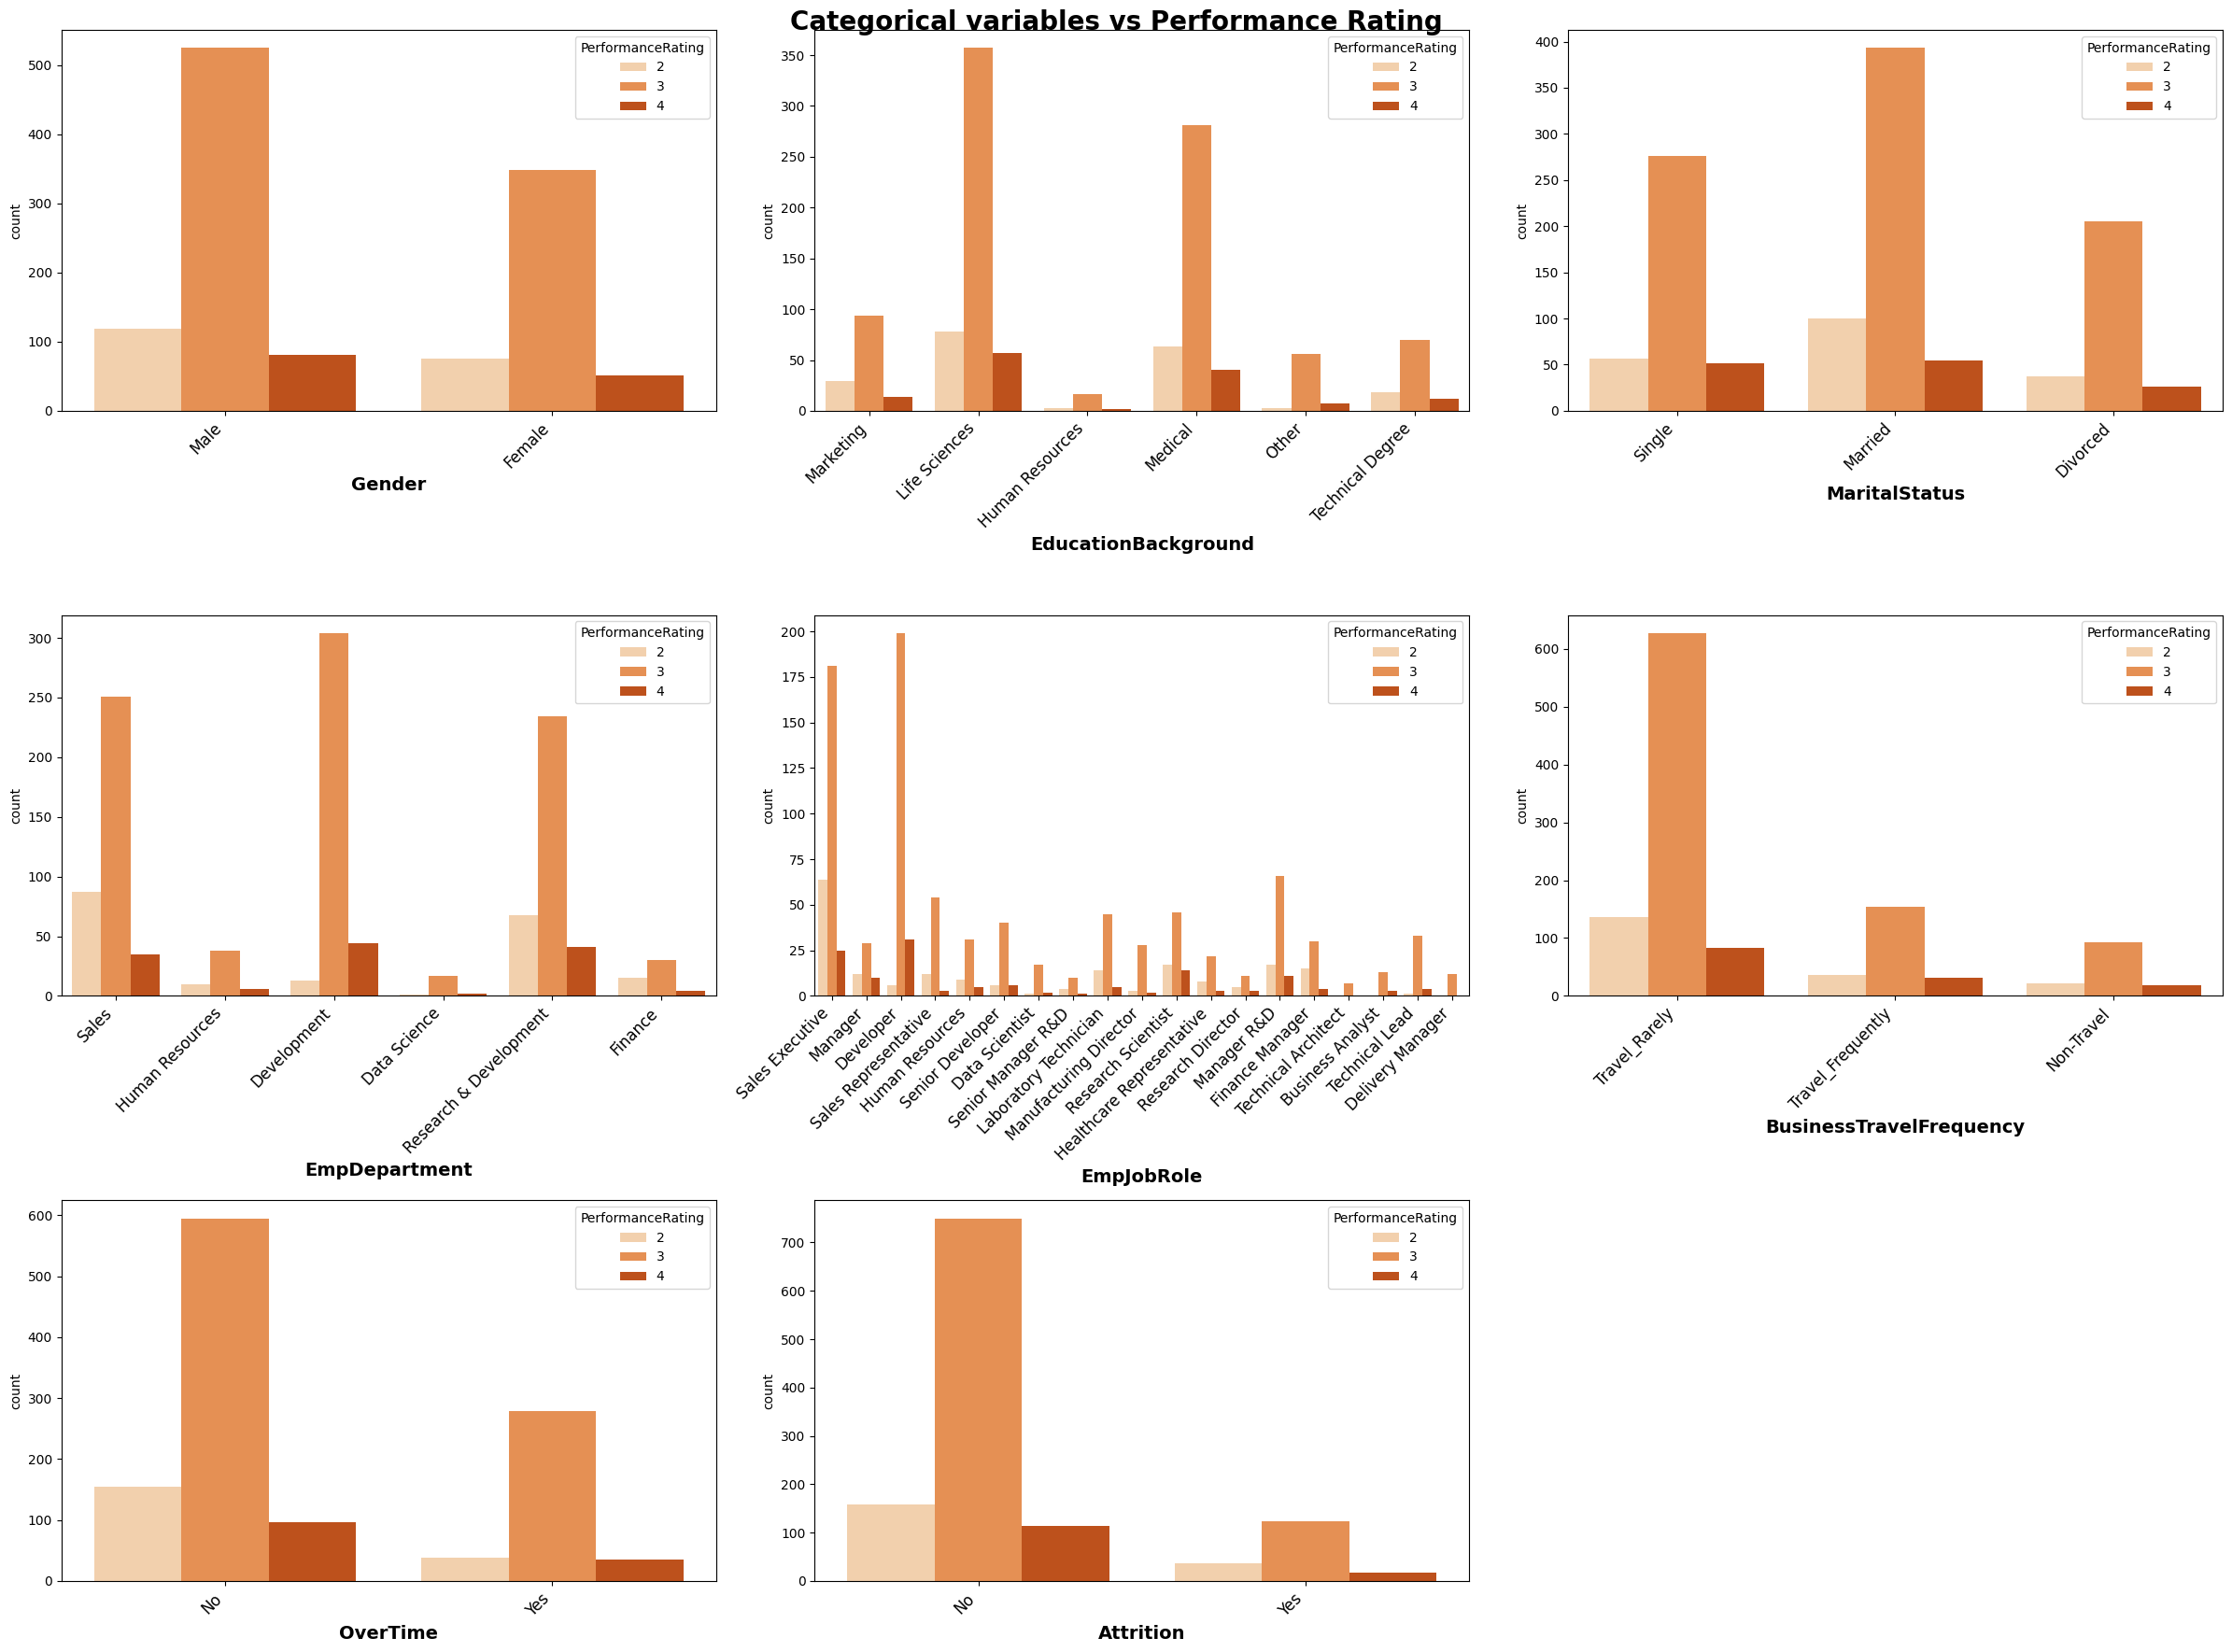

In [502]:
# categorical vs Perfromance Rating analysis
fig, axes= plt.subplots(3,3, figsize= (24,18))
fig.suptitle("Categorical variables vs Performance Rating", fontsize=20, weight='bold')
sns.countplot(data=employee_data, x='Gender', hue= 'PerformanceRating', ax=axes[0,0], palette= sns.color_palette('Oranges',3))
sns.countplot(data=employee_data, x= 'EducationBackground', hue= 'PerformanceRating', ax=axes[0,1], palette= sns.color_palette('Oranges',3))
sns.countplot(data=employee_data, x= 'MaritalStatus', hue= 'PerformanceRating', ax=axes[0,2], palette= sns.color_palette('Oranges',3))
sns.countplot(data=employee_data, x= 'EmpDepartment', hue= 'PerformanceRating', ax=axes[1,0], palette= sns.color_palette('Oranges',3))
sns.countplot(data=employee_data, x= 'EmpJobRole', hue= 'PerformanceRating', ax=axes[1,1], palette= sns.color_palette('Oranges',3))
sns.countplot(data=employee_data, x= 'BusinessTravelFrequency', hue= 'PerformanceRating', ax=axes[1,2], palette= sns.color_palette('Oranges',3))
sns.countplot(data=employee_data, x= 'OverTime', hue= 'PerformanceRating', ax=axes[2,0], palette= sns.color_palette('Oranges',3))
sns.countplot(data=employee_data, x= 'Attrition', hue= 'PerformanceRating', ax=axes[2,1], palette= sns.color_palette('Oranges',3))


# Flatttening the 2D arary into 1D array for easy iteration
axes= axes.flatten()

# creating a list of the x labels
x_labels_cat = ['Gender', 'EducationBackground', 'MaritalStatus', 'EmpDepartment', 'EmpJobRole',
                'BusinessTravelFrequency', 'OverTime', 'Attrition']

# setting the fontsize of xlabels and  rotating xtick labels at an angle for better visibility
for i, label in enumerate(x_labels_cat):
    axes[i].set_xlabel(label, fontsize=14, weight ='bold')
    axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45, ha='right', fontsize=12)


#Turning off the empty axis
axes[-1].axis('off')

plt.tight_layout()
plt.show()


3. Multivariate Analyis

- Understanding how numerical features relate with one another. 

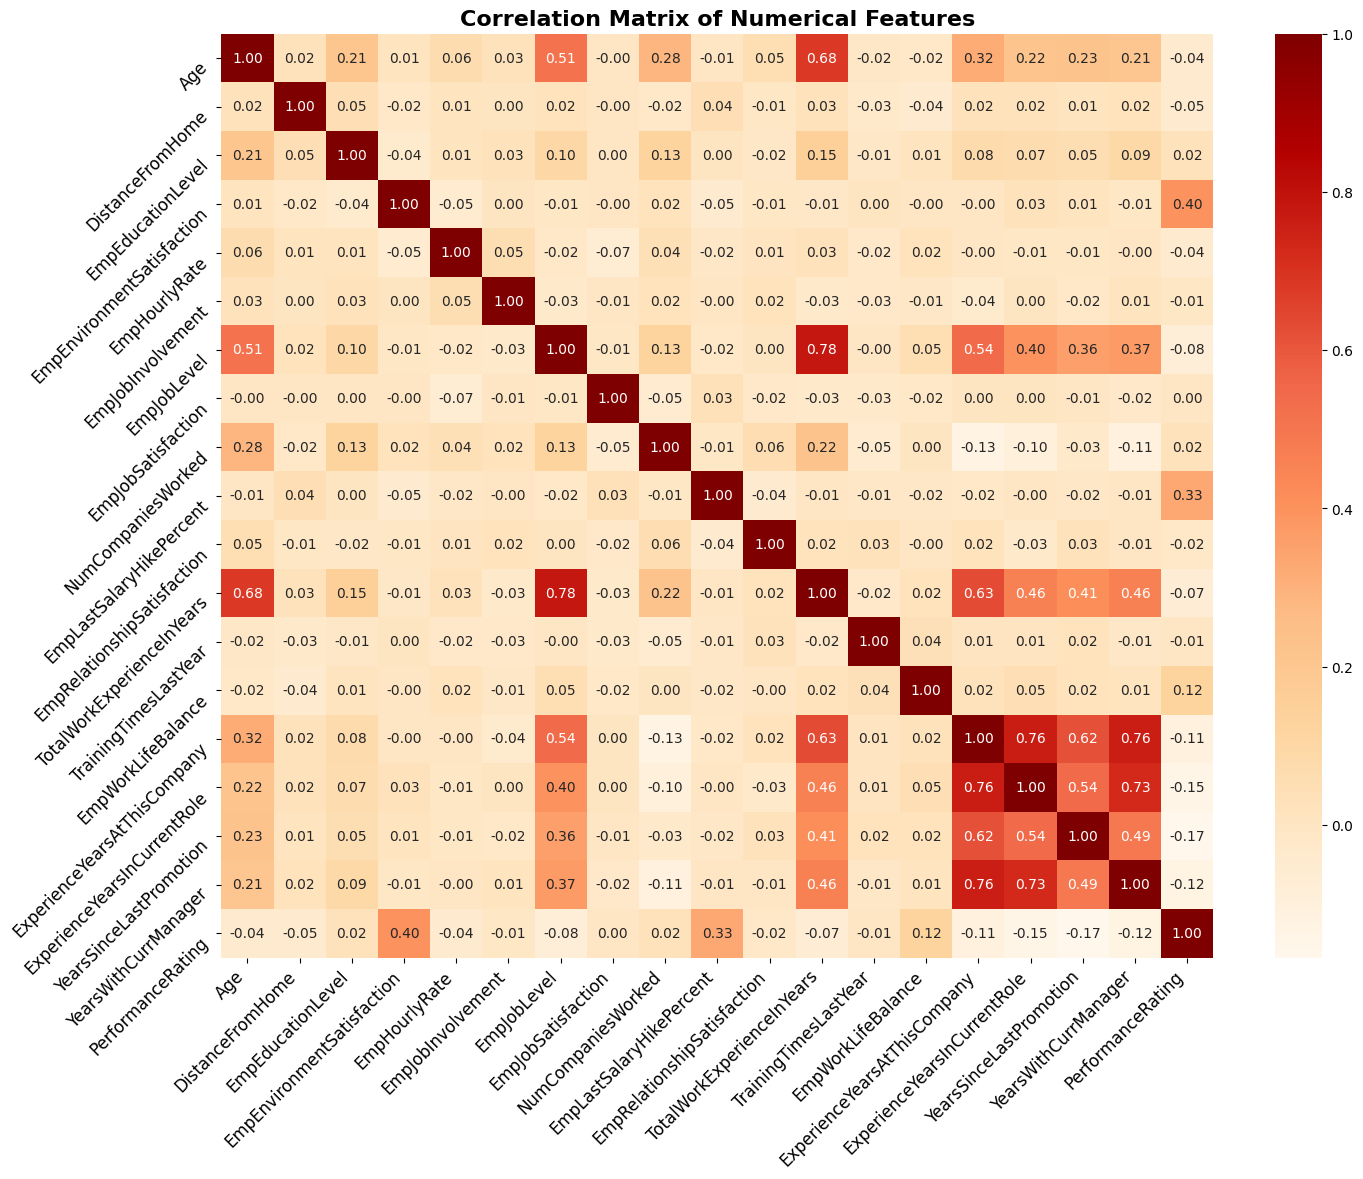

In [503]:
# creating a correlation matrix for numerical features
num_features= employee_data.select_dtypes(include='number')
corr_matrix = num_features.corr()

# Visualizing the corrleation matrix using a heatmap
plt.figure(figsize=(16,12))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='OrRd')
plt.title('Correlation Matrix of Numerical Features', fontsize=16, weight='bold')

# Rotating the x and y labels for better visibility
for i,label in enumerate(num_features.columns):
    plt.xticks(rotation=45, ha='right', fontsize=12)
    plt.yticks(rotation=45, va='top',fontsize=12)
plt.show()

Correlation Heatmap Interpretation – Key Insights

1. Age

- Age has a very weak negative correlation with performance rating (-0.04), suggesting minimal influence on employee performance.

- Age shows strong positive relationships with total work experience (0.68) and moderate positive correlation with employee job level (0.51).

2. Employee Job Level

- Job level has a slight negative correlation with performance rating (-0.08), indicating higher-level employees do not necessarily have higher performance ratings.

- It has strong positive correlation with total work experience (0.78) and moderate positive correlations with age (0.51) and years at the company (0.54).

3. Total Work Experience (Years)

- Performance rating is weakly negatively correlated with total work experience (-0.07), which is contrary to expectations in a typical workplace.

- Total experience strongly correlates with employee job level (0.78), age (0.68), and years at the company (0.63). Moderate positive relationships exist with experience in current role (0.46), years with current manager (0.46), and years since last promotion (0.41).

4. Experience at Current Company (Years)

- Slight negative correlation with performance rating (-0.11).

- Strong positive correlation with experience in current role (0.76) and years with current manager (0.76). Moderate positive correlations exist with employee job level (0.54), years since last promotion (0.62), and total work experience (0.63).

5. Experience in Current Role

- Weak negative correlation with performance rating (-0.15).

- Strong positive correlations with years at company (0.76) and years with current manager (0.73). Moderate positive relationships with years since last promotion (0.54), total work experience (0.46), and employee job level (0.40).

6. Years Since Last Promotion

- Weak negative correlation with performance rating (-0.17).

- Strong positive correlation with experience at company (0.62) and in current role (0.54). Moderate positive relationships with years with current manager (0.49), total work experience (0.41), and employee job level (0.36).

7. Years with Current Manager

- Weak negative correlation with performance rating (-0.12).

- Strong positive correlations with experience at company (0.76) and in current role (0.73). Moderate positive correlations with years since last promotion (0.49), total work experience (0.46), and employee job level (0.37).

8. Performance Rating

- Shows moderate positive correlations with employee environment satisfaction (0.40) and last salary hike percentage (0.33), and a weak positive correlation with work-life balance (0.12).

9. Other Variables

- Distance from home, hourly rate, job involvement, relationship satisfaction, and training time last year have weak negative correlations with performance rating.

- Education level, number of companies worked, salary hike percentage, and overall job satisfaction show weak positive correlations with performance rating.

Overall Insights

1. Performance drivers: Employee environment satisfaction and salary increases appear to be the most positively associated with higher performance ratings. Work-life balance also plays a minor role.

3. Experience factors: Surprisingly, most measures of experience (age, total work experience, years at company, role tenure, years since promotion, years with manager) show weak negative correlations with performance. This may indicate that longer tenure does not automatically translate to higher performance in this organization.

4. Interrelated factors: Experience-related variables are strongly intercorrelated, reflecting expected career progression patterns (e.g., older employees tend to have more experience and higher job levels).

5. Actionable insight: Organizations may benefit from focusing on employee satisfaction, recognition, and skill development rather than assuming experience alone drives higher performance.

In [504]:
# supporting the top three performance rating with crosstabs
print(pd.crosstab(employee_data['EmpEnvironmentSatisfaction'], employee_data['PerformanceRating'], margins=True))
print("*"*100)

print(pd.crosstab(employee_data['EmpLastSalaryHikePercent'], employee_data['PerformanceRating'], margins=True))
print("*"*100)

print(pd.crosstab(employee_data['EmpWorkLifeBalance'], employee_data['PerformanceRating'], margins=True))
print("*"*100)


PerformanceRating             2    3    4   All
EmpEnvironmentSatisfaction                     
1                            90  127   13   230
2                            98  130   14   242
3                             3  310   54   367
4                             3  307   51   361
All                         194  874  132  1200
****************************************************************************************************
PerformanceRating           2    3    4   All
EmpLastSalaryHikePercent                     
11                         28  140    1   169
12                         30  123    2   155
13                         27  138    3   168
14                         28  140    4   172
15                         11   67    4    82
16                         12   54    2    68
17                          9   55    3    67
18                         10   63    0    73
19                         10   51    2    63
20                          9   14   27    50
21         

TOP 3 IMPORTANT FACTORS AFFECTING EMPLOYEE PERFORMANCE

From the correlation heatmap matrix and crosstabs, these factors are:

1. Employee Environment Satisfaction

- Employee environment satisfaction appears to be strongly associated with performance. Low-satisfaction employees (levels 1 and 2) contribute the highest number of low performers, while highly satisfied employees (levels 3 and 4) contribute most of the high performers. This suggests that a supportive work environment positively influences performance.

2. Employee Last Salary Hike Percent

- Salary hikes of 20–22% have the highest concentration of top performers, while smaller increments (11–19%) are dominated by average or below-average performers. This suggests that performance-based salary increments may be effective and that higher hikes are typically given to high-performing employees.

3. Employee Work Life Balance

- Employees with the poorest work–life balance (level 1) have no high performers, while levels 3 and 4 include the majority of the top performers. This indicates that maintaining a healthy work–life balance supports higher employee performance.



DATA PREPROCESSING

- Converting categorical columns into numerical columns

- Imputing outliers

- Checking for missing values and handling duplicates


In [505]:
# importing the necessary dependencies
from sklearn.preprocessing import StandardScaler

In [506]:
# create a copy of the original dataset
employeedata= employee_data.copy()

# droping EmpNumber column as it is an identifier column
employeedata= employeedata.drop(columns=['EmpNumber'], axis=1)

# listing all the categorical variables
cat_columns= employeedata.select_dtypes(include='object').columns.tolist()
print(f"The categorical columns are:\n {cat_columns}")


The categorical columns are:
 ['Gender', 'EducationBackground', 'MaritalStatus', 'EmpDepartment', 'EmpJobRole', 'BusinessTravelFrequency', 'OverTime', 'Attrition']


In [507]:
# rechecking for missing values in the dataset
print(employeedata.isnull().sum())
print("There are no missing values in the dataset")

Age                             0
Gender                          0
EducationBackground             0
MaritalStatus                   0
EmpDepartment                   0
EmpJobRole                      0
BusinessTravelFrequency         0
DistanceFromHome                0
EmpEducationLevel               0
EmpEnvironmentSatisfaction      0
EmpHourlyRate                   0
EmpJobInvolvement               0
EmpJobLevel                     0
EmpJobSatisfaction              0
NumCompaniesWorked              0
OverTime                        0
EmpLastSalaryHikePercent        0
EmpRelationshipSatisfaction     0
TotalWorkExperienceInYears      0
TrainingTimesLastYear           0
EmpWorkLifeBalance              0
ExperienceYearsAtThisCompany    0
ExperienceYearsInCurrentRole    0
YearsSinceLastPromotion         0
YearsWithCurrManager            0
Attrition                       0
PerformanceRating               0
dtype: int64
There are no missing values in the dataset


A. Converting Categorical Columns to Numerical columns

1. Label encoding for categorical variables with two categories(binary)--> Overtime and Attrition.

2. Mapping encoding - We will assign numerical values to categorical features based on descending order after getting their frequencies.

3. Frequency mapping - We will use the value counts obtained earlier for each category to convert the categorical variables to numerical variables.

In [508]:
# importing the necessary dependencies for encoding

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler 
from scipy import stats    # used for statistical opertaions

In [509]:
# label encoding for binary categorical variables

# initalizing the label encoder
Over_encoder= LabelEncoder()
Att_encoder= LabelEncoder()

# fitting and transforming the overtime and atttrition columns
employeedata['OverTime']=Over_encoder.fit_transform(employeedata['OverTime'])
employeedata['Attrition']=Att_encoder.fit_transform(employeedata['Attrition'])

In [510]:
# mapping the categorical columns to numerical columns manually for features with minimal labels
employeedata['Gender'] = employeedata['Gender'].map({'Male':1, 'Female':0})
print(employeedata['Gender'].value_counts())
print("*"*100)

employeedata['MaritalStatus'] = employeedata['MaritalStatus'].map({'Married':2, 'Single':1, 'Divorced':0})
print(employeedata['MaritalStatus'].value_counts())
print("*"*100)

employeedata['BusinessTravelFrequency'] = employeedata['BusinessTravelFrequency'].map({'Travel_Rarely':2,
                                                            'Travel_Frequently':1,'Non-Travel':0})
print(employeedata['BusinessTravelFrequency'].value_counts())
print("*"*100)


# mapping the categorical columns to numerical columns based on their 
# frequencies in descending order, for features with high number labels

print("Mapping categorical columns to numerical columns based on their frequencies in descending order.\n")
employeedata.loc[employeedata['EducationBackground']=='Life Sciences','EducationBackground']=5
employeedata.loc[employeedata['EducationBackground']=='Medical','EducationBackground']=4
employeedata.loc[employeedata['EducationBackground']=='Marketing','EducationBackground']=3
employeedata.loc[employeedata['EducationBackground']=='Technical Degree','EducationBackground']=2
employeedata.loc[employeedata['EducationBackground']=='Other','EducationBackground']=1
employeedata.loc[employeedata['EducationBackground']=='Human Resources','EducationBackground']=0
print(employeedata['EducationBackground'].value_counts())
print("*"*100)

employeedata.loc[employeedata['EmpDepartment']=='Sales','EmpDepartment']=5
employeedata.loc[employeedata['EmpDepartment']=='Development','EmpDepartment']=4
employeedata.loc[employeedata['EmpDepartment']=='Research & Development','EmpDepartment']=3
employeedata.loc[employeedata['EmpDepartment']=='Human Resources','EmpDepartment']=2
employeedata.loc[employeedata['EmpDepartment']=='Finance','EmpDepartment']=1
employeedata.loc[employeedata['EmpDepartment']=='Data Science','EmpDepartment']=0
print(employeedata['EmpDepartment'].value_counts())
print("*"*100)


employeedata.loc[employeedata['EmpJobRole']=='Sales Executive','EmpJobRole']=18
employeedata.loc[employeedata['EmpJobRole']=='Developer','EmpJobRole']=17
employeedata.loc[employeedata['EmpJobRole']=='Manager R&D','EmpJobRole']=16
employeedata.loc[employeedata['EmpJobRole']=='Research Scientist','EmpJobRole']=15
employeedata.loc[employeedata['EmpJobRole']=='Sales Representative','EmpJobRole']=14
employeedata.loc[employeedata['EmpJobRole']=='Laboratory Technician','EmpJobRole']=13
employeedata.loc[employeedata['EmpJobRole']=='Senior Developer','EmpJobRole']=12
employeedata.loc[employeedata['EmpJobRole']=='Manager','EmpJobRole']=11
employeedata.loc[employeedata['EmpJobRole']=='Finance Manager','EmpJobRole']=10
employeedata.loc[employeedata['EmpJobRole']=='Human Resources','EmpJobRole']=9
employeedata.loc[employeedata['EmpJobRole']=='Technical Lead','EmpJobRole']=8
employeedata.loc[employeedata['EmpJobRole']=='Manufacturing Director','EmpJobRole']=7
employeedata.loc[employeedata['EmpJobRole']=='Healthcare Representative','EmpJobRole']=6
employeedata.loc[employeedata['EmpJobRole']=='Data Scientist','EmpJobRole']=5
employeedata.loc[employeedata['EmpJobRole']=='Research Director','EmpJobRole']=4
employeedata.loc[employeedata['EmpJobRole']=='Business Analyst','EmpJobRole']=3
employeedata.loc[employeedata['EmpJobRole']=='Senior Manager R&D','EmpJobRole']=2
employeedata.loc[employeedata['EmpJobRole']=='Delivery Manager','EmpJobRole']=1
employeedata.loc[employeedata['EmpJobRole']=='Technical Architect','EmpJobRole']=0
print("EmpJobRole mapped based on their frequencies in descending order from 18 to 0.\n")
print("*"*100)


Gender
1    725
0    475
Name: count, dtype: int64
****************************************************************************************************
MaritalStatus
2    548
1    384
0    268
Name: count, dtype: int64
****************************************************************************************************
BusinessTravelFrequency
2    846
1    222
0    132
Name: count, dtype: int64
****************************************************************************************************
Mapping categorical columns to numerical columns based on their frequencies in descending order.

EducationBackground
5    492
4    384
3    137
2    100
1     66
0     21
Name: count, dtype: int64
****************************************************************************************************
EmpDepartment
5    373
4    361
3    343
2     54
1     49
0     20
Name: count, dtype: int64
****************************************************************************************************
EmpJobRo

In [511]:
# setting the display option to default to show all columns
pd.set_option('display.max_columns', None)

# rechecking the first 5 rows of the encoded dataset.
employeedata.head()

,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpHourlyRate,EmpJobInvolvement,EmpJobLevel,EmpJobSatisfaction,NumCompaniesWorked,OverTime,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
0,32,1,3,1,5,18,2,10,3,4,55,3,2,4,1,0,12,4,10,2,2,10,7,0,8,0,3
1,47,1,3,1,5,18,2,14,4,4,42,3,2,1,2,0,12,4,20,2,3,7,7,1,7,0,3
2,40,1,5,2,5,18,1,5,4,4,48,2,3,1,5,1,21,3,20,2,3,18,13,1,12,0,4
3,41,1,0,0,2,11,2,10,4,2,73,2,5,4,3,0,15,2,23,2,2,21,6,12,6,0,3
4,60,1,3,1,5,18,2,16,4,1,84,3,2,1,8,0,14,4,10,1,3,2,2,2,2,0,3


B. Imputing Outliers as per the boxplot output

- We will use IQR to impute outliers since data is not normally  distributed.

- IQR is the Interquartile range, obtained by the difference between third and first quartile. It is a single median value that summarizes data when it has outliers as opposed to mean which is susceptible to outliers.

 




In [512]:
# imputing outliers in DistanceFromHome
# computing IQR,Q3 and Q1

Q1= employeedata['DistanceFromHome'].quantile(0.25)
Q3= employeedata['DistanceFromHome'].quantile(0.75)
IQR=Q3-Q1

# computing bounds
print("IQR: ",IQR)
lower_bound= Q1-1.5*IQR
print("Lower bound:",lower_bound)
higher_bound = Q3+1.5*IQR
print("Higher bound:",higher_bound)

# checking for lower and upper end outliers (fix)
lower_outliers = employeedata[employeedata['DistanceFromHome'] < lower_bound]
upper_outliers = employeedata[employeedata['DistanceFromHome'] > higher_bound]

print(lower_outliers)
print(upper_outliers)

# computing the median value
median_value= employeedata['DistanceFromHome'].median()

# imputing outliers
employeedata.loc[
    (employeedata['DistanceFromHome'] < lower_bound) | (employeedata['DistanceFromHome'] > higher_bound), 
    'DistanceFromHome'
] = median_value



IQR:  12.0
Lower bound: -16.0
Higher bound: 32.0
Empty DataFrame
Columns: [Age, Gender, EducationBackground, MaritalStatus, EmpDepartment, EmpJobRole, BusinessTravelFrequency, DistanceFromHome, EmpEducationLevel, EmpEnvironmentSatisfaction, EmpHourlyRate, EmpJobInvolvement, EmpJobLevel, EmpJobSatisfaction, NumCompaniesWorked, OverTime, EmpLastSalaryHikePercent, EmpRelationshipSatisfaction, TotalWorkExperienceInYears, TrainingTimesLastYear, EmpWorkLifeBalance, ExperienceYearsAtThisCompany, ExperienceYearsInCurrentRole, YearsSinceLastPromotion, YearsWithCurrManager, Attrition, PerformanceRating]
Index: []
Empty DataFrame
Columns: [Age, Gender, EducationBackground, MaritalStatus, EmpDepartment, EmpJobRole, BusinessTravelFrequency, DistanceFromHome, EmpEducationLevel, EmpEnvironmentSatisfaction, EmpHourlyRate, EmpJobInvolvement, EmpJobLevel, EmpJobSatisfaction, NumCompaniesWorked, OverTime, EmpLastSalaryHikePercent, EmpRelationshipSatisfaction, TotalWorkExperienceInYears, TrainingTimesLast

In [513]:
# imputing outliers in EmpEnvironmetSatisfaction
# computing IQR,Q3 and Q1

Q1= employeedata['EmpEnvironmentSatisfaction'].quantile(0.25)
Q3= employeedata['EmpEnvironmentSatisfaction'].quantile(0.75)
IQR=Q3-Q1

# computing bounds
print("IQR: ",IQR)
lower_bound= Q1-1.5*IQR
print("Lower bound:",lower_bound)
higher_bound = Q3+1.5*IQR
print("Higher bound:",higher_bound)

# checking for lower and upper end outliers (fix)
lower_outliers = employeedata[employeedata['EmpEnvironmentSatisfaction'] < lower_bound]
upper_outliers = employeedata[employeedata['EmpEnvironmentSatisfaction'] > higher_bound]

print(lower_outliers)
print(upper_outliers)

# computing the median value
median_value= employeedata['EmpEnvironmentSatisfaction'].median()

# imputing outliers
employeedata.loc[
    (employeedata['EmpEnvironmentSatisfaction'] < lower_bound) | (employeedata['EmpEnvironmentSatisfaction'] > higher_bound), 
    'EmpEnvironmentSatisfaction'
] = median_value

IQR:  2.0
Lower bound: -1.0
Higher bound: 7.0
Empty DataFrame
Columns: [Age, Gender, EducationBackground, MaritalStatus, EmpDepartment, EmpJobRole, BusinessTravelFrequency, DistanceFromHome, EmpEducationLevel, EmpEnvironmentSatisfaction, EmpHourlyRate, EmpJobInvolvement, EmpJobLevel, EmpJobSatisfaction, NumCompaniesWorked, OverTime, EmpLastSalaryHikePercent, EmpRelationshipSatisfaction, TotalWorkExperienceInYears, TrainingTimesLastYear, EmpWorkLifeBalance, ExperienceYearsAtThisCompany, ExperienceYearsInCurrentRole, YearsSinceLastPromotion, YearsWithCurrManager, Attrition, PerformanceRating]
Index: []
Empty DataFrame
Columns: [Age, Gender, EducationBackground, MaritalStatus, EmpDepartment, EmpJobRole, BusinessTravelFrequency, DistanceFromHome, EmpEducationLevel, EmpEnvironmentSatisfaction, EmpHourlyRate, EmpJobInvolvement, EmpJobLevel, EmpJobSatisfaction, NumCompaniesWorked, OverTime, EmpLastSalaryHikePercent, EmpRelationshipSatisfaction, TotalWorkExperienceInYears, TrainingTimesLastYea

In [514]:
# imputing outliers in EmpJobLevel
# computing IQR,Q3 and Q1

Q1= employeedata['EmpJobLevel'].quantile(0.25)
Q3= employeedata['EmpJobLevel'].quantile(0.75)
IQR=Q3-Q1

# computing bounds
print("IQR: ",IQR)
lower_bound= Q1-1.5*IQR
print("Lower bound:",lower_bound)
higher_bound = Q3+1.5*IQR
print("Higher bound:",higher_bound)

# checking for lower and upper end outliers (fix)
lower_outliers = employeedata[employeedata['EmpJobLevel'] < lower_bound]
upper_outliers = employeedata[employeedata['EmpJobLevel'] > higher_bound]

print(lower_outliers)
print(upper_outliers)

# computing the median value
median_value= employeedata['EmpJobLevel'].median()

# imputing outliers
employeedata.loc[
    (employeedata['EmpJobLevel'] < lower_bound) | (employeedata['EmpJobLevel'] > higher_bound), 
    'EmpJobLevel'
] = median_value


IQR:  2.0
Lower bound: -2.0
Higher bound: 6.0
Empty DataFrame
Columns: [Age, Gender, EducationBackground, MaritalStatus, EmpDepartment, EmpJobRole, BusinessTravelFrequency, DistanceFromHome, EmpEducationLevel, EmpEnvironmentSatisfaction, EmpHourlyRate, EmpJobInvolvement, EmpJobLevel, EmpJobSatisfaction, NumCompaniesWorked, OverTime, EmpLastSalaryHikePercent, EmpRelationshipSatisfaction, TotalWorkExperienceInYears, TrainingTimesLastYear, EmpWorkLifeBalance, ExperienceYearsAtThisCompany, ExperienceYearsInCurrentRole, YearsSinceLastPromotion, YearsWithCurrManager, Attrition, PerformanceRating]
Index: []
Empty DataFrame
Columns: [Age, Gender, EducationBackground, MaritalStatus, EmpDepartment, EmpJobRole, BusinessTravelFrequency, DistanceFromHome, EmpEducationLevel, EmpEnvironmentSatisfaction, EmpHourlyRate, EmpJobInvolvement, EmpJobLevel, EmpJobSatisfaction, NumCompaniesWorked, OverTime, EmpLastSalaryHikePercent, EmpRelationshipSatisfaction, TotalWorkExperienceInYears, TrainingTimesLastYea

In [515]:
# imputing outliers in NumCompaniesWorked
# computing IQR,Q3 and Q1

Q1= employeedata['NumCompaniesWorked'].quantile(0.25)
Q3= employeedata['NumCompaniesWorked'].quantile(0.75)
IQR=Q3-Q1

# computing bounds
print("IQR: ",IQR)
lower_bound= Q1-1.5*IQR
print("Lower bound:",lower_bound)
higher_bound = Q3+1.5*IQR
print("Higher bound:",higher_bound)

# checking for lower and upper end outliers (fix)
lower_outliers = employeedata[employeedata['NumCompaniesWorked'] < lower_bound]
upper_outliers = employeedata[employeedata['NumCompaniesWorked'] > higher_bound]

# computing the median value
median_value= employeedata['NumCompaniesWorked'].median()

# imputing outliers
employeedata.loc[
    (employeedata['NumCompaniesWorked'] < lower_bound) | (employeedata['NumCompaniesWorked'] > higher_bound), 
    'NumCompaniesWorked'
] = median_value


IQR:  3.0
Lower bound: -3.5
Higher bound: 8.5


In [516]:
# imputing outliers in EmpLastSalaryHikePercent
# computing IQR,Q3 and Q1

Q1= employeedata['EmpLastSalaryHikePercent'].quantile(0.25)
Q3= employeedata['EmpLastSalaryHikePercent'].quantile(0.75)
IQR=Q3-Q1

# computing bounds
print("IQR: ",IQR)
lower_bound= Q1-1.5*IQR
print("Lower bound:",lower_bound)
higher_bound = Q3+1.5*IQR
print("Higher bound:",higher_bound)

# checking for lower and upper end outliers (fix)
lower_outliers = employeedata[employeedata['EmpLastSalaryHikePercent'] < lower_bound]
upper_outliers = employeedata[employeedata['EmpLastSalaryHikePercent'] > higher_bound]

print(lower_outliers)
print(upper_outliers)

# computing the median value
median_value= employeedata['EmpLastSalaryHikePercent'].median()

# imputing outliers
employeedata.loc[
    (employeedata['EmpLastSalaryHikePercent'] < lower_bound) | (employeedata['EmpLastSalaryHikePercent'] > higher_bound), 
    'EmpLastSalaryHikePercent'
] = median_value


IQR:  6.0
Lower bound: 3.0
Higher bound: 27.0
Empty DataFrame
Columns: [Age, Gender, EducationBackground, MaritalStatus, EmpDepartment, EmpJobRole, BusinessTravelFrequency, DistanceFromHome, EmpEducationLevel, EmpEnvironmentSatisfaction, EmpHourlyRate, EmpJobInvolvement, EmpJobLevel, EmpJobSatisfaction, NumCompaniesWorked, OverTime, EmpLastSalaryHikePercent, EmpRelationshipSatisfaction, TotalWorkExperienceInYears, TrainingTimesLastYear, EmpWorkLifeBalance, ExperienceYearsAtThisCompany, ExperienceYearsInCurrentRole, YearsSinceLastPromotion, YearsWithCurrManager, Attrition, PerformanceRating]
Index: []
Empty DataFrame
Columns: [Age, Gender, EducationBackground, MaritalStatus, EmpDepartment, EmpJobRole, BusinessTravelFrequency, DistanceFromHome, EmpEducationLevel, EmpEnvironmentSatisfaction, EmpHourlyRate, EmpJobInvolvement, EmpJobLevel, EmpJobSatisfaction, NumCompaniesWorked, OverTime, EmpLastSalaryHikePercent, EmpRelationshipSatisfaction, TotalWorkExperienceInYears, TrainingTimesLastYea

In [517]:
# imputing outliers in TotalWorkExperienceInYears
# computing IQR,Q3 and Q1

Q1= employeedata['TotalWorkExperienceInYears'].quantile(0.25)
Q3= employeedata['TotalWorkExperienceInYears'].quantile(0.75)
IQR=Q3-Q1

# computing bounds
print("IQR: ",IQR)
lower_bound= Q1-1.5*IQR
print("Lower bound:",lower_bound)
higher_bound = Q3+1.5*IQR
print("Higher bound:",higher_bound)

# checking for lower and upper end outliers (fix)
lower_outliers = employeedata[employeedata['TotalWorkExperienceInYears'] < lower_bound]
upper_outliers = employeedata[employeedata['TotalWorkExperienceInYears'] > higher_bound]


# computing the median value
median_value= employeedata['TotalWorkExperienceInYears'].median()

# imputing outliers
employeedata.loc[
    (employeedata['TotalWorkExperienceInYears'] < lower_bound) | (employeedata['TotalWorkExperienceInYears'] > higher_bound), 
    'TotalWorkExperienceInYears'
] = median_value


IQR:  9.0
Lower bound: -7.5
Higher bound: 28.5


In [518]:
# imputing outliers in TrainingTimesLastYear
# computing IQR,Q3 and Q1

Q1= employeedata['TrainingTimesLastYear'].quantile(0.25)
Q3= employeedata['TrainingTimesLastYear'].quantile(0.75)
IQR=Q3-Q1

# computing bounds
print("IQR: ",IQR)
lower_bound= Q1-1.5*IQR
print("Lower bound:",lower_bound)
higher_bound = Q3+1.5*IQR
print("Higher bound:",higher_bound)

# checking for lower and upper end outliers (fix)
lower_outliers = employeedata[employeedata['TotalWorkExperienceInYears'] < lower_bound]
upper_outliers = employeedata[employeedata['TotalWorkExperienceInYears'] > higher_bound]

# computing the median value
median_value= employeedata['TrainingTimesLastYear'].median()

# imputing outliers
employeedata.loc[
    (employeedata['TrainingTimesLastYear'] < lower_bound) | (employeedata['TrainingTimesLastYear'] > higher_bound), 
    'TrainingTimesLastYear'
] = median_value


IQR:  1.0
Lower bound: 0.5
Higher bound: 4.5


In [519]:
# imputing outliers in EmpWorkLifeBalance
# computing IQR,Q3 and Q1

Q1= employeedata['EmpWorkLifeBalance'].quantile(0.25)
Q3= employeedata['EmpWorkLifeBalance'].quantile(0.75)
IQR=Q3-Q1

# computing bounds
print("IQR: ",IQR)
lower_bound= Q1-1.5*IQR
print("Lower bound:",lower_bound)
higher_bound = Q3+1.5*IQR
print("Higher bound:",higher_bound)

# computing the median value
median_value= employeedata['EmpWorkLifeBalance'].median()

# imputing outliers
employeedata.loc[
    (employeedata['EmpWorkLifeBalance'] < lower_bound) | (employeedata['EmpWorkLifeBalance'] > higher_bound), 
    'EmpWorkLifeBalance'
] = median_value


IQR:  1.0
Lower bound: 0.5
Higher bound: 4.5


In [520]:
# imputing outliers in ExperienceYearsAtThisCompany
# computing IQR,Q3 and Q1

Q1= employeedata['ExperienceYearsAtThisCompany'].quantile(0.25)
Q3= employeedata['ExperienceYearsAtThisCompany'].quantile(0.75)
IQR=Q3-Q1

# computing bounds
print("IQR: ",IQR)
lower_bound= Q1-1.5*IQR
print("Lower bound:",lower_bound)
higher_bound = Q3+1.5*IQR
print("Higher bound:",higher_bound)

# checking for lower and upper end outliers (fix)
lower_outliers = employeedata[employeedata['TotalWorkExperienceInYears'] < lower_bound]
upper_outliers = employeedata[employeedata['TotalWorkExperienceInYears'] > higher_bound]

# computing the median value
median_value= employeedata['ExperienceYearsAtThisCompany'].median()

# imputing outliers
employeedata.loc[
    (employeedata['ExperienceYearsAtThisCompany'] < lower_bound) | (employeedata['ExperienceYearsAtThisCompany'] > higher_bound), 
    'ExperienceYearsAtThisCompany'
] = median_value

IQR:  7.0
Lower bound: -7.5
Higher bound: 20.5


In [521]:
# imputing outliers in ExperienceYearsInCurrentRole
# computing IQR,Q3 and Q1

Q1= employeedata['ExperienceYearsInCurrentRole'].quantile(0.25)
Q3= employeedata['ExperienceYearsInCurrentRole'].quantile(0.75)
IQR=Q3-Q1

# computing bounds
print("IQR: ",IQR)
lower_bound= Q1-1.5*IQR
print("Lower bound:",lower_bound)
higher_bound = Q3+1.5*IQR
print("Higher bound:",higher_bound)

# computing the median value
median_value= employeedata['ExperienceYearsInCurrentRole'].median()

# imputing outliers
employeedata.loc[
    (employeedata['ExperienceYearsInCurrentRole'] < lower_bound) | (employeedata['ExperienceYearsInCurrentRole'] > higher_bound), 
   'ExperienceYearsInCurrentRole'
] = median_value

IQR:  5.0
Lower bound: -5.5
Higher bound: 14.5


In [522]:
# imputing outliers in YearsSinceLastPromotion
# computing IQR,Q3 and Q1

Q1= employeedata['YearsSinceLastPromotion'].quantile(0.25)
Q3= employeedata['YearsSinceLastPromotion'].quantile(0.75)
IQR=Q3-Q1

# computing bounds
print("IQR: ",IQR)
lower_bound= Q1-1.5*IQR
print("Lower bound:",lower_bound)
higher_bound = Q3+1.5*IQR
print("Higher bound:",higher_bound)

# checking for lower and upper end outliers (fix)
lower_outliers = employeedata[employeedata['YearsSinceLastPromotion'] < lower_bound]
upper_outliers = employeedata[employeedata['YearsSinceLastPromotion'] > higher_bound]

# computing the median value
median_value= employeedata['YearsSinceLastPromotion'].median()

# imputing outliers
employeedata.loc[
    (employeedata['YearsSinceLastPromotion'] < lower_bound) | (employeedata['YearsSinceLastPromotion'] > higher_bound), 
   'YearsSinceLastPromotion'
] = median_value

IQR:  3.0
Lower bound: -4.5
Higher bound: 7.5


In [523]:
# imputing outliers in YearsWithCurrManager
# computing IQR,Q3 and Q1

Q1= employeedata['YearsWithCurrManager'].quantile(0.25)
Q3= employeedata['YearsWithCurrManager'].quantile(0.75)
IQR=Q3-Q1

# computing bounds
print("IQR: ",IQR)
lower_bound= Q1-1.5*IQR
print("Lower bound:",lower_bound)
higher_bound = Q3+1.5*IQR
print("Higher bound:",higher_bound)

# computing the median value
median_value= employeedata['YearsWithCurrManager'].median()

# imputing outliers
employeedata.loc[
    (employeedata['YearsWithCurrManager'] < lower_bound) | (employeedata['YearsWithCurrManager'] > higher_bound), 
 'YearsWithCurrManager'
] = median_value

IQR:  5.0
Lower bound: -5.5
Higher bound: 14.5


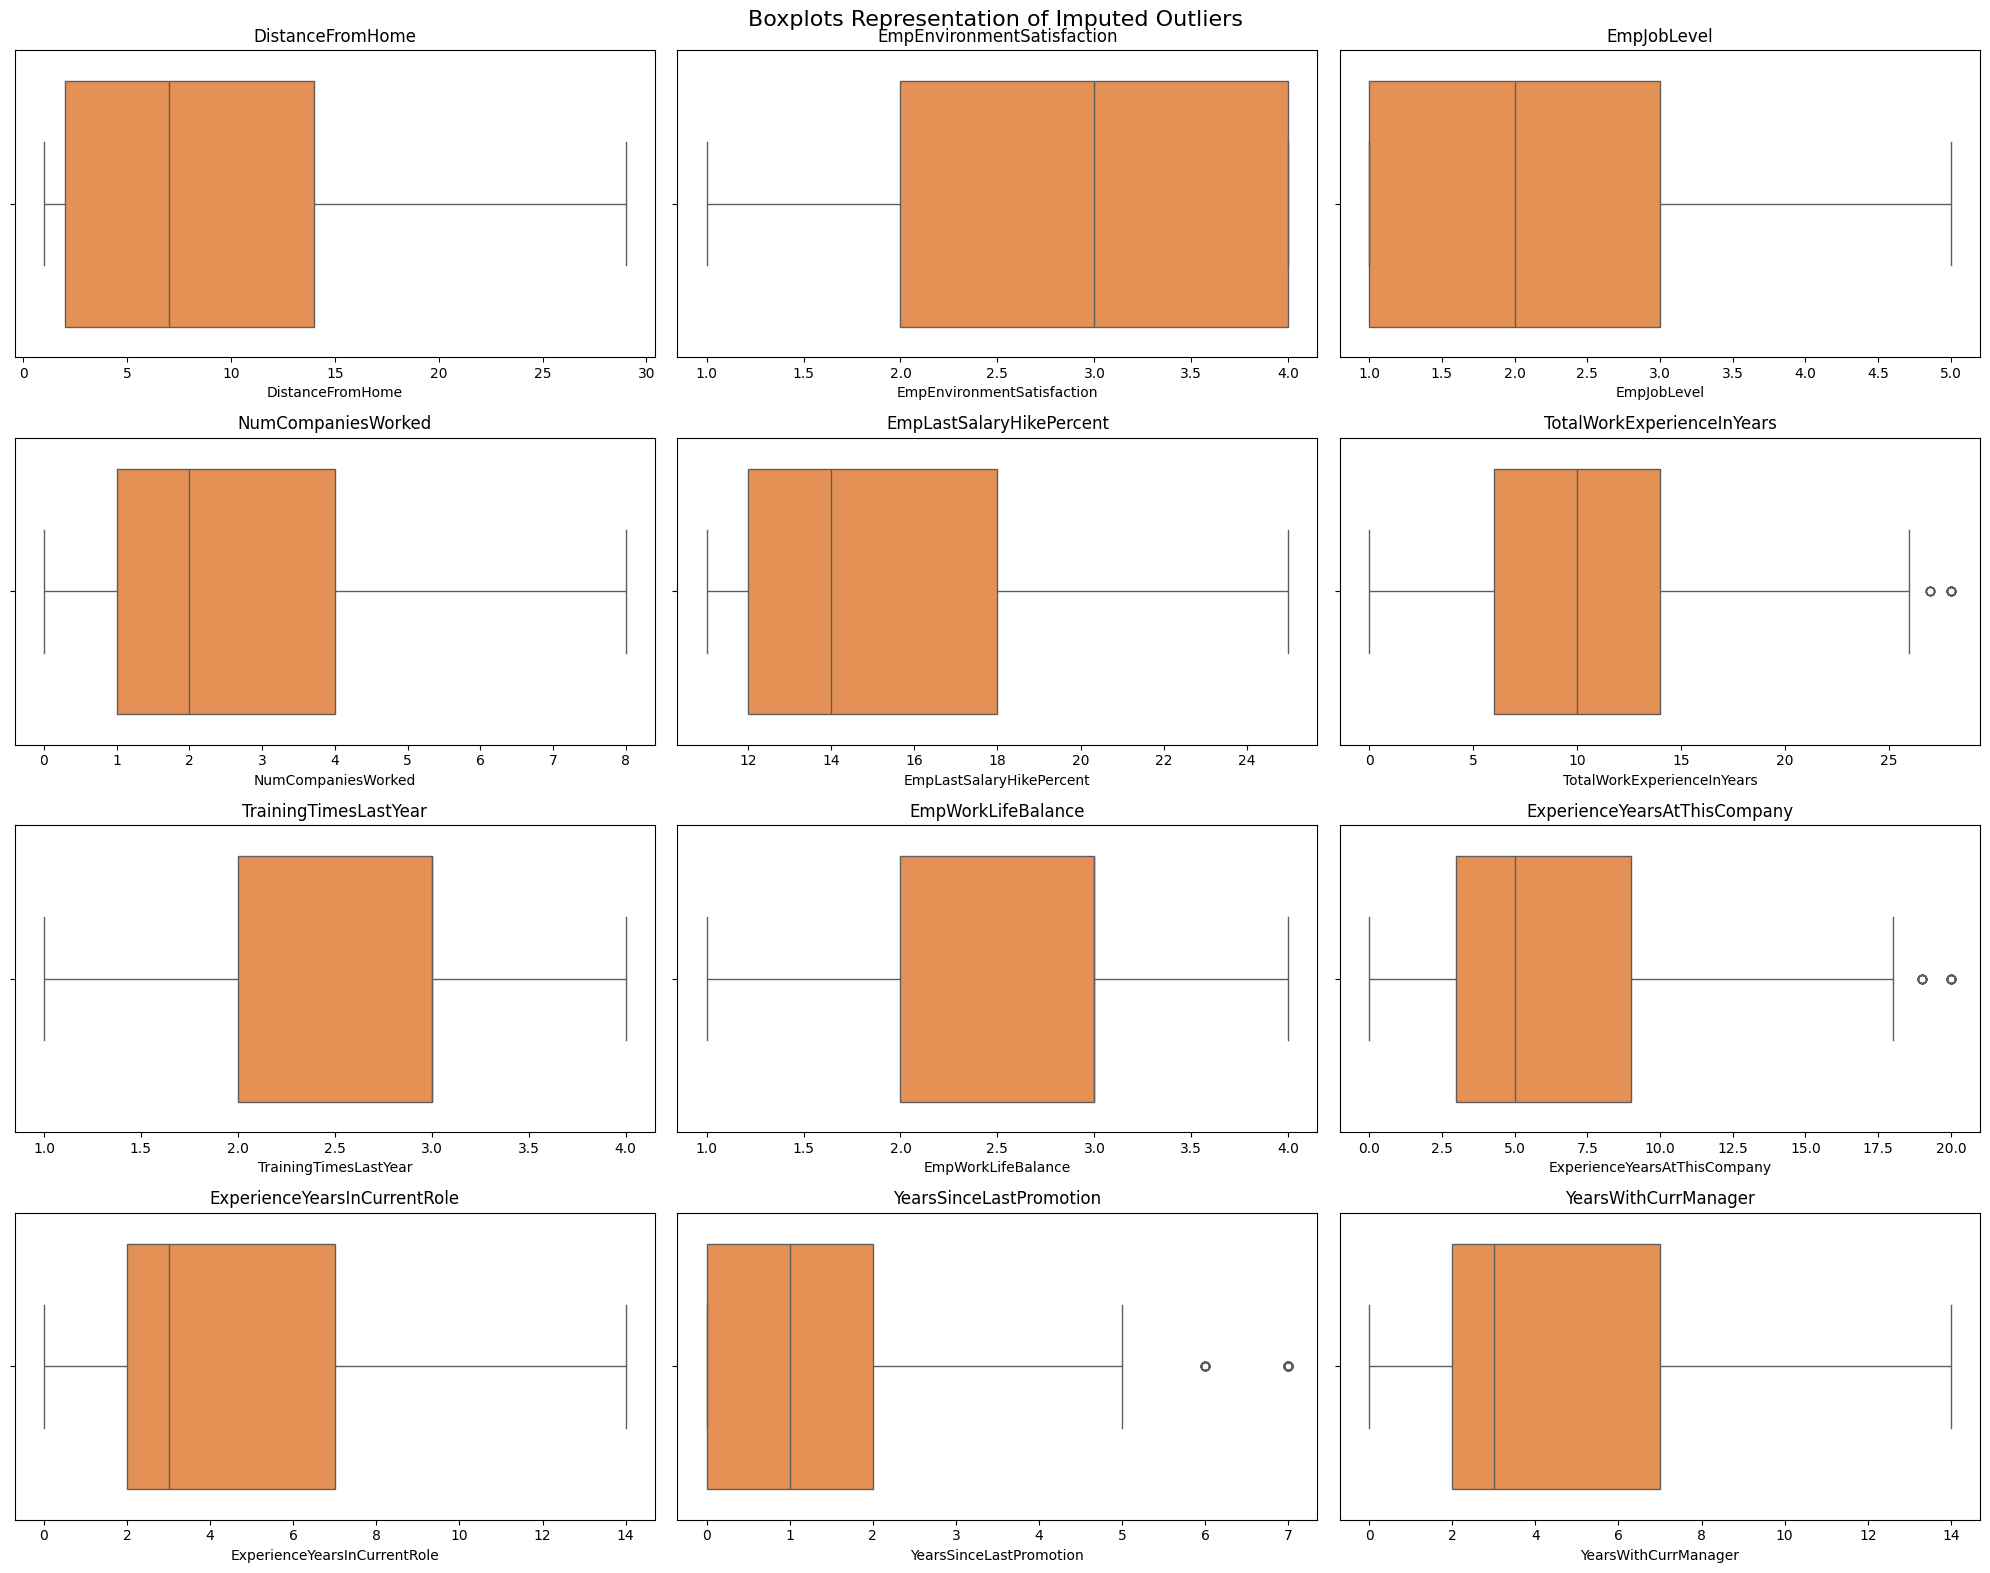

In [524]:
# Checking for outliers after imputation

# creating a list of imputetd outlier variables
out_var= ['DistanceFromHome','EmpEnvironmentSatisfaction','EmpJobLevel','NumCompaniesWorked',
          'EmpLastSalaryHikePercent','TotalWorkExperienceInYears','TrainingTimesLastYear','EmpWorkLifeBalance',
          'ExperienceYearsAtThisCompany','ExperienceYearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager']

# creating subplots
fig, ax = plt.subplots(4, 3, figsize=(20, 16))
fig.suptitle("Boxplots Representation of Imputed Outliers", fontsize=16)

# flattening the axes array so we can index easily
ax = ax.flatten()

# iterate and plot
for i, var in enumerate(out_var):
    sns.boxplot(data=employeedata, x=var, ax=ax[i], palette=sns.color_palette("Oranges", n_colors=1))
    ax[i].set_title(var)

# adjust layout
plt.tight_layout()
plt.show()

Observations: 

- Outliers have been successfully imputed in most variables. This is exception of a few which still shows outliers, so we can not impute further.

In [525]:
# checking for duplicates in the dataset
print(employeedata.duplicated().sum())
print("The dataset has no duplicate value")

0
The dataset has no duplicate value


BALANCING TARGET VARIABLE

1. SMOTENC Technichque: (Synthetic Minority Oversampling Technique for Nominal and Continuous features)

- This project  used SMOTENC to balance the performance rating classes because the dataset contains both numerical and categorical features. SMOTENC is specifically designed for mixed-type data and generates synthetic minority samples in a realistic way without distorting categorical values.


In [526]:
# importing the necessary dependencies

from collections import Counter
from imblearn.over_sampling import SMOTENC

In [527]:
# Separating the features and target 
X= employeedata.drop(['PerformanceRating'], axis=1)

Y= employeedata['PerformanceRating']

In [528]:
# creating a list of categorical columns from the original dataset 
categorical_cols = [ 'Gender', 'EducationBackground', 'MaritalStatus', 'EmpDepartment', 
                    'EmpJobRole', 'BusinessTravelFrequency', 'EmpEducationLevel', 'EmpEnvironmentSatisfaction',
                    'EmpJobInvolvement', 'EmpJobLevel', 'EmpJobSatisfaction', 'NumCompaniesWorked', 'OverTime', 
                    'EmpRelationshipSatisfaction', 'EmpWorkLifeBalance', 'Attrition'] 

# getting the index of categorical columns 
cat_index= [employeedata.columns.get_loc(col) for col in categorical_cols]

print(cat_index, '\n')

print("Before SMOTENC:", Counter(Y), '\n') 

# initializing the SMOTENC object 
sm = SMOTENC(categorical_features=cat_index, random_state=42)

# resampling X and Y  --new set to be used for the traini_test_split
X_resampled, y_resampled = sm.fit_resample(X, Y) 

print("After SMOTENC:", Counter(y_resampled))

[1, 2, 3, 4, 5, 6, 8, 9, 11, 12, 13, 14, 15, 17, 20, 25] 

Before SMOTENC: Counter({3: 874, 2: 194, 4: 132}) 



After SMOTENC: Counter({3: 874, 4: 874, 2: 874})


FEATURE TRANSFORMATION

- This will involve standardization of the training variables, to obtain standard deviation of 1 and mean of 0, enabling the data to assume normal distribution.



In [529]:
# importing the train_test_split dependency
from sklearn.model_selection import train_test_split

In [530]:
# Splitting the data into training and test data before scaling

X_train,X_test, y_train, y_test = train_test_split(X_resampled,y_resampled, test_size=0.2, random_state= 42)

# inspecting the shape of the split data

print(f"The X_resampled,X_train,X_test shapes respectively are: \n{X_resampled.shape, X_train.shape,X_test.shape}")
print("*"*100)
print(f"The y_resampled,y_train,y_test shapes respectively are: \n{y_resampled.shape, y_train.shape,y_test.shape}")

The X_resampled,X_train,X_test shapes respectively are: 
((2622, 26), (2097, 26), (525, 26))
****************************************************************************************************
The y_resampled,y_train,y_test shapes respectively are: 
((2622,), (2097,), (525,))


In [531]:
# standardizing the trained data

# initializing the standardscaler
scaler= StandardScaler()

# fitting and transforming the X_train
X_train_standardized= scaler.fit_transform(X_train)

#trasnforming the X test
X_test_standardized= scaler.transform(X_test)

# inspecting the shape of the scaled data
print(X_resampled.shape, X_train_standardized.shape, X_test_standardized.shape)

(2622, 26) (2097, 26) (525, 26)


In [532]:
# checking the standard deviation and mean of X_train_standardized and X_test_standardized

print(f"Standard deviation of X_train scaled is: {X_train_standardized.std()}")
print(f"The mean of X_train scaled is: {X_train_standardized.mean():.1f}")
print("*"*100)

print(f"Standard deviation of X_test scaled is: {X_test_standardized.std()}")
print(f"The mean of X_test scaled is: {X_test_standardized.mean():.1f}")
print("*"*100)

print("Trained data has been successfully scaled.")

Standard deviation of X_train scaled is: 1.0
The mean of X_train scaled is: -0.0
****************************************************************************************************
Standard deviation of X_test scaled is: 0.9955620462011507
The mean of X_test scaled is: 0.0
****************************************************************************************************
Trained data has been successfully scaled.


MODEL TRAINING, EVALUATION AND PREDICTION

- Training of atleast 3 models and selecting one with the best performance.

- Fitting and training the model

- Evaluating the model performance

- Making predictive system

- Identifying the most influencing factors of analysis


1. Support Vector Machine(SVM) model:

- This is a supervised machine learning model/algorithm that tries to find the best boundary(hyperplane) that separates data into different classes.

In [533]:
# importing the necessary dependencies

from sklearn import svm # support vector machine algorithm
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

Model Training

- Experimerting with both linear and rbf(radial basis function) kernels.

In [534]:
# checking the shape of traiing data and test data
print(f"X train feature shape:{X_train_standardized.shape}")
print(f"Y train target shape:{y_train.shape}")

X train feature shape:(2097, 26)
Y train target shape:(2097,)


In [535]:
# initializingthe model
# kernel selection as linear

model_classifier = svm.SVC(kernel='linear', random_state=42, probability=True)

# fitting the training data to the model

model_classifier.fit(X_train_standardized, y_train)

,C,1.0
,kernel,'linear'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,True
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


Model evaluation

In [536]:
#creating the y predicted values for both the traininga and test data
# y train predicted values
y_train_pred= model_classifier.predict(X_train_standardized)

# y test predicted values
y_pred= model_classifier.predict(X_test_standardized)


# evaluating the accuracy of the model on both the training and test data

print("The Trainining and Test accuracy scores and classification reports  for linear kernel respectively:\n")
# evaluating the accuracy on the training data
accuracy_train_score = accuracy_score(y_train_pred,y_train)
print(f"The acurracy score of the trained data is: {accuracy_train_score:.2f}\n")
print(f"The classification report of training data is:\n {classification_report(y_train_pred,y_train)}")
print("*"*100)


# evaluating the accuracy of the test data
accuracy_test_score= accuracy_score(y_pred,y_test)
print(f"The accuracy score of the test data, is: {accuracy_test_score:.2f}\n")
print(f"The classification report of the test data is:\n{classification_report(y_pred,y_test)}")

The Trainining and Test accuracy scores and classification reports  for linear kernel respectively:

The acurracy score of the trained data is: 0.85

The classification report of training data is:
               precision    recall  f1-score   support

           2       0.92      0.82      0.87       776
           3       0.74      0.83      0.78       623
           4       0.89      0.90      0.90       698

    accuracy                           0.85      2097
   macro avg       0.85      0.85      0.85      2097
weighted avg       0.86      0.85      0.85      2097

****************************************************************************************************
The accuracy score of the test data, is: 0.82

The classification report of the test data is:
              precision    recall  f1-score   support

           2       0.90      0.80      0.85       205
           3       0.66      0.80      0.73       143
           4       0.90      0.86      0.88       177

    accu

In [537]:
# initializing the model
# kernel selection as rbf

model_classifier1= svm.SVC(kernel='rbf', random_state=42, probability=True)

#fitting the training data to the model
model_classifier1.fit(X_train_standardized, y_train)


,C,1.0
,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,True
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [538]:

# creating y predicted values of the training and testing data
# creating y predicted values of the training data
y_train_1_pred= model_classifier1.predict(X_train_standardized)

# creating y predicted values of the test data
y_pred_1= model_classifier1.predict(X_test_standardized)

# evaluating the accuracy of the training and test data
print("The Training and Test accuracy scores and classification reports  for rbf kernel respectively:\n")

# evaluating the accuracy of the training data
accuracy_training_score1= accuracy_score(y_train_1_pred,y_train)
print(f"The acurracy score of the trained data is: {accuracy_training_score1:.2f}\n")
print(f"The classification report of training data is:\n {classification_report(y_train_1_pred,y_train)}")
print("*"*100)

accuracy_test_score1= accuracy_score(y_pred_1,y_test)
print(f"The accuracy score of the test data, is: {accuracy_test_score1:.2f}\n")
print(f"The classification report of the test data is:\n{classification_report(y_pred_1,y_test)}")

The Training and Test accuracy scores and classification reports  for rbf kernel respectively:

The acurracy score of the trained data is: 0.96

The classification report of training data is:
               precision    recall  f1-score   support

           2       0.98      0.94      0.96       723
           3       0.92      0.96      0.94       678
           4       0.97      0.98      0.97       696

    accuracy                           0.96      2097
   macro avg       0.96      0.96      0.96      2097
weighted avg       0.96      0.96      0.96      2097

****************************************************************************************************
The accuracy score of the test data, is: 0.91

The classification report of the test data is:
              precision    recall  f1-score   support

           2       0.93      0.90      0.91       190
           3       0.85      0.89      0.87       165
           4       0.95      0.94      0.95       170

    accuracy 

Insights and selection of the kernel for the SVM model

- The project experimented with different SVM kernels to determine which one provided the best fit for the employee performance dataset. The Linear kernel achieved a test accuracy of 82%, indicating that the data is not linearly separable. In contrast, the RBF(radial basis function) kernel recorded a significantly higher test accuracy of 91%.

- This improvement suggests that the underlying relationships in the dataset are non-linear. The RBF kernel is capable of modeling complex, curved decision boundaries, making it better suited for datasets with mixed categorical and numerical features like ours. Based on its superior generalization performance, I selected the RBF kernel as the optimal choice for this classification task.

- Camparison of accuracy score of the training and test data, shows training data performs well at 96% while the test data still laggs behind at 91%. Therefore hyperparameter tunning will be done with the help of GridSearchCV, to reduce the mild overfitting.

Hyperparameter Tunning

- This was done to reduce the mild overfitting as the training accuracy was 96% and the test accuracy was 91%. It therefore helps achieve model optimization and generalization. GridSearchCV was  applied to identify the combination of parameters that produces the most robust classifier.

In [539]:
# importing the necesary library
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score
import numpy as np

In [540]:
# defining the parameter grid

param_grid= {
    'C': [0.1,0.5, 1, 5,10, 50,100],    # controls the regularization stregnth
    'gamma': [0.001,0.005,0.01,0.05,0.1,0.5,1]  # controls kernel coeeficient
}

# initializing the model
model_classifier1= svm.SVC(kernel='rbf', random_state=42, probability=True)

# defining grid search
grid = GridSearchCV(model_classifier1,
                    param_grid,
                    cv=5,      # cross-validation, testing at 1 training at 4
                    scoring='f1_macro',   # better for imbalanced multi-class dataset(focusing on minority class) 
                                    # as acurracy might be misleading
                    n_jobs=-1,      # allows all available CPU cores to be used for faster grid search
                    refit= True,
                    verbose=2
                    )

# fitting the data for grid search
grid.fit(X_train_standardized, y_train)


print("Best Parameters:", grid.best_params_)
print("Best CV Accuracy:", grid.best_score_)

# Predict using best model
best_model = grid.best_estimator_
y_tunned_pred = best_model.predict(X_test_standardized)

print("Test Accuracy with Tuned Model:", accuracy_score(y_tunned_pred,y_test),'\n')
print(f"Test classification report with Tunned model:\n{classification_report(y_tunned_pred,y_test)}")


Fitting 5 folds for each of 49 candidates, totalling 245 fits
Best Parameters: {'C': 5, 'gamma': 0.1}
Best CV Accuracy: 0.8899179847533123
Test Accuracy with Tuned Model: 0.8914285714285715 

Test classification report with Tunned model:
              precision    recall  f1-score   support

           2       0.82      0.95      0.88       158
           3       0.93      0.79      0.85       205
           4       0.93      0.97      0.95       162

    accuracy                           0.89       525
   macro avg       0.89      0.90      0.89       525
weighted avg       0.90      0.89      0.89       525



Interpretation of after Hyperparameter tunning

- Although the tuned RBF SVM achieved a slightly lower accuracy (89% vs. 91%), it delivered a higher and more stable F1-score, indicating improved performance on the minority class. Hyperparameter tuning reduced overfitting and produced a more generalizable model.

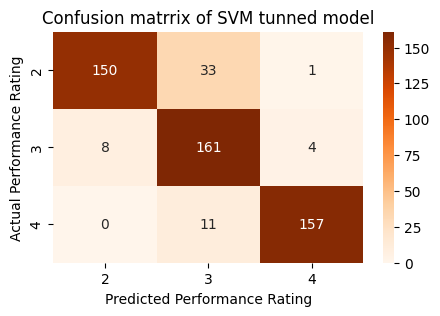

In [541]:
# generating a confusion matrix
c_matrix = confusion_matrix(y_test,y_tunned_pred, labels=[2,3,4])  # this gives the PerformancingRating in order

# plotting confusion matrix heatmap
plt.figure(figsize =(5,3))
sns.heatmap(c_matrix,annot =True,fmt ='d',cmap = 'Oranges',
            xticklabels=[2,3,4],
            yticklabels=[2,3,4])
plt.xlabel('Predicted Performance Rating')
plt.ylabel('Actual Performance Rating')
plt.title('Confusion matrrix of SVM tunned model')
plt.show()

Confusion matrix interpretation:

1. Class by class interpretation:

i. Performance Rating = 2 (Actual = 2)

Correctly classified: 150 employees, misclassified as 3: 33 employees,misclassified as 4: 1 employee

- The model performs well on class 2, but it slightly struggles to distinguish between ratings 2 and 3.

ii. Performance Rating = 3 (Actual = 3)

Correctly classified: 161 employees, misclassified as 2: 8 employees, misclassified as 4: 4 employees

- Class 3 has the highest correct prediction rate. The model distinguishes this class reliably from the others.

iii. Performance Rating = 4 (Actual = 4)

Correctly classified: 157 employees, misclassified as 3: 11 employees, misclassified as 2: 0 employees

- Most errors occur between 3 and 4, with some rating 4 employees being predicted as 3.

Overall Insights:

- The confusion matrix reveals that the SVM RBF model predicts employee performance ratings with high accuracy, correctly classifying most employees across all three rating categories. The model shows strongest performance for rating 3, with minimal confusion across neighboring classes. 

- Misclassifications primarily occur between adjacent performance levels, which is expected given the ordinal nature of the target variable. Importantly, the model avoids major misclassifications (e.g., predicting 2 as 4), indicating stable and reliable prediction behavior. 

- Overall, the model demonstrates strong generalization and is suitable for performance prediction applications.

Making a predictive system

In [542]:
# creating a list to hold the data
input_data = [60,1,3,1,5,18,2,16,4,1,84,3,2,1,8,0,14,4,10,1,3,2,2,2,2,0]

# Converting the list to a numpy array for easy manipulation by the model
input_data_as_array =  np.asarray(input_data)

# reshaping the numpy array into a 2D as we are using 1D in our data
input_data_reshaped = input_data_as_array.reshape(1,-1)

# Standardizing the input data
Standard_input_data = scaler.transform(input_data_reshaped)
print(Standard_input_data)

# fitting the standardized input data into the model
predictions = best_model.predict(Standard_input_data)

# calling the predict value
print("\nThis is the target:", predictions)

if predictions[0] == 2:
    print("The employee demonstrates a low performance rating.")
elif predictions[0] == 3:
    print("The employee demonstrates an average performance rating.")
else:
    print("The employee demonstrates a high performance rating.")


[[ 2.67127724  0.73460709 -1.05185182 -0.47459537  1.06992752  0.8266955
   0.46607142  0.9288135   1.12596958 -1.45284914  0.88417609  0.36617776
   0.03745811 -1.60355596  3.00595643 -0.44144286 -0.61688539  1.15862969
   0.00322178 -2.17323752  0.27153893 -0.95727631 -0.67503247  0.29697378
  -0.6239628  -0.31013546]]

This is the target: [3]
The employee demonstrates an average performance rating.


2. Random Forest

- This is an ensemble learning method that constructs multiple decision trees and combines their predictions to improve overall performance and reduce overfitting.

- It works by training each tree on a random subset of the data and using a random subset of features for each split, resulting in a diverse set of trees that generalize a better new data.

In [543]:
# importing the necessary library
from sklearn.ensemble import RandomForestClassifier

In [544]:
# initilalizing the model

m_random_classifier= RandomForestClassifier(n_estimators=100, random_state=42)

In [545]:
# training the model - not using scaled trained data.
m_random_classifier.fit(X_train,y_train)


#printing the model details
print("Model details:\n")

# Number of trees in the forest
print('Number of trees in the forest:', len(m_random_classifier.estimators_))
print("*"*60)

# shape of the training and test data
print(f"The X, X_train and X_test shapes respectively: \n{X_resampled.shape,X_train.shape, X_test.shape}\n")
print(f"The Y, y_train and y_test shapes respectively: \n{y_resampled.shape,y_train.shape, y_test.shape}")

Model details:

Number of trees in the forest: 100
************************************************************
The X, X_train and X_test shapes respectively: 
((2622, 26), (2097, 26), (525, 26))

The Y, y_train and y_test shapes respectively: 
((2622,), (2097,), (525,))


In [546]:
# making predictions

# training data y predicted values
y_train_pred_random= m_random_classifier.predict(X_train)

# test data y predicted values
y_pred_random= m_random_classifier.predict(X_test)


In [547]:
# checking the accuracy of the training and test data

# accuracy of the training data
print("The accuracy and classification reports of the training and test data for random forest respectively:\n")
accuracy_train_random = accuracy_score(y_train_pred_random, y_train)
print(f"The accuracy score of the trained data is: {accuracy_train_random}\n")
classification_train_report = classification_report(y_train_pred_random,y_train)
print(f"The classification report of the trained data is: \n{classification_train_report}")
print("*"*100)

# accuracy of the test data
accuracy_test_random= accuracy_score(y_pred_random,y_test)
print(f"The accuracy score of the test data is: {accuracy_test_random}")
classification_test_report = classification_report(y_pred_random,y_test)
print(f"The classification report of the test data is: \n{classification_test_report}")


The accuracy and classification reports of the training and test data for random forest respectively:

The accuracy score of the trained data is: 1.0

The classification report of the trained data is: 
              precision    recall  f1-score   support

           2       1.00      1.00      1.00       690
           3       1.00      1.00      1.00       701
           4       1.00      1.00      1.00       706

    accuracy                           1.00      2097
   macro avg       1.00      1.00      1.00      2097
weighted avg       1.00      1.00      1.00      2097

****************************************************************************************************
The accuracy score of the test data is: 0.9542857142857143
The classification report of the test data is: 
              precision    recall  f1-score   support

           2       0.98      0.95      0.96       190
           3       0.91      0.95      0.93       165
           4       0.98      0.96      0.97   

The training accuracy is 100% while that of testing is 95%, this means the model is performing well but slight overfitting is seen. Therefore hyperparameter tunning using RandomizedSearchCV will be used to reduce overfitting and it fast and efficient.

In [548]:
# importing the necessary dependencies
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV

In [549]:
# defining the model
rf_classifier = RandomForestClassifier(random_state=24)

# defining the paarameters
params_dist={
    "n_estimators": [100, 200, 300, 400, 500],   # number of decision trees in the forest
    "max_depth": [None, 10, 20, 30, 40, 50],    # max no of level in each decision tree
    "min_samples_split": [2, 5, 10],          # Min number of data points placed in a node before the node is split
    "min_samples_leaf": [1, 2, 4],          # Min number of data point allowed in leaf node
    "max_features": ["sqrt", "log2", None],  # Max no of feature consider to create decision tree
    "bootstrap": [True, False]
}

random_search = RandomizedSearchCV(
    estimator=rf_classifier,
    param_distributions=params_dist,
    n_iter=30,             # number of combinations to try
    cv=5,                  # 5-fold cross-validation
    verbose=2,
    random_state=42,
    n_jobs=-1              # use all cores
)

# fitting the training data for randomized search
random_search.fit(X_train, y_train)

# identifying the best parameters and the best model
print("Best paarmeters:", random_search.best_params_)

best_rf_classifier= random_search.best_estimator_

# evaluating tunned model

# creating y_tunned predicted values
y_tunned_pred= best_rf_classifier.predict(X_test)

# getting the accuraccy of the tunned model
print("Accuracy:", accuracy_score(y_tunned_pred, y_pred))
print(classification_report(y_tunned_pred, y_pred))



Fitting 5 folds for each of 30 candidates, totalling 150 fits
Best paarmeters: {'n_estimators': 400, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': None, 'bootstrap': False}
Accuracy: 0.8361904761904762
              precision    recall  f1-score   support

           2       0.82      0.90      0.86       187
           3       0.83      0.69      0.75       171
           4       0.86      0.91      0.88       167

    accuracy                           0.84       525
   macro avg       0.84      0.83      0.83       525
weighted avg       0.84      0.84      0.83       525



Interpretation of after hyperparameter tunning:

- The optimized model produced a lower test accuracy of 83% compared to the initial model which had an accuracy of 95%. While this tuned model reduced overfitting, the drop in accuracy suggests that the original model captured more predictive patterns in the dataset, despite its tendency to overfit.The tuned model, however, demonstrated more balanced precision and recall across the three performance rating classes.

- Overall, the initial model remains the better-performing model in terms of accuracy.

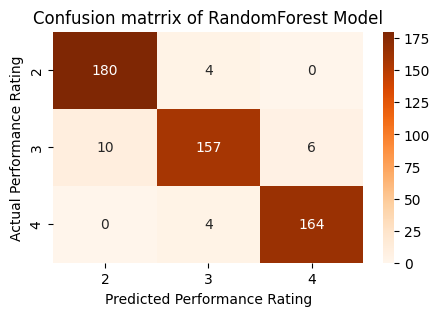

In [550]:
# generating a confusion matrix
c_matrix_rf = confusion_matrix(y_test,y_pred_random, labels=[2,3,4])  # this gives the PerformancingRating in order

# plotting confusion matrix heatmap
plt.figure(figsize =(5,3))
sns.heatmap(c_matrix_rf,annot =True,fmt ='d',cmap = 'Oranges',
            xticklabels=[2,3,4],
            yticklabels=[2,3,4])
plt.xlabel('Predicted Performance Rating')
plt.ylabel('Actual Performance Rating')
plt.title('Confusion matrrix of RandomForest Model')
plt.show()

Confusion matrix interpretation:

1. Class by class interpretation:

i. Performance Rating = 2 (Actual = 2)

Correctly classified: 180 employees, misclassified as 3: 4 employees,misclassified as 4: 0 employee

- The model performs well on class 2, but it slightly classifies ratings 2 as 3.

ii. Performance Rating = 3 (Actual = 3)

Correctly classified: 157 employees, misclassified as 2: 10 employees, misclassified as 4: 6 employees

- Class 3 has the least correct prediction rate. The model  slightly struggles to distinguish between the three classes.

iii. Performance Rating = 4 (Actual = 4)

Correctly classified: 164 employees, misclassified as 3: 4 employees, misclassified as 2: 0 employees

- Most errors occur between 3 and 4, with some rating 4 employees being predicted as 3.

Overall Insights:

- The confusion matrix reveals that the Random Forest model predicts employee performance ratings with high accuracy, correctly classifying most employees across all three rating categories. The model shows strongest performance for rating 2, with minimal confusion across neighboring classes. 

- Misclassifications primarily occur between adjacent performance levels, which is expected given the ordinal nature of the target variable. Importantly, the model avoids major misclassifications (e.g., predicting 2 as 4), indicating stable and reliable prediction behavior. 

- Overall, the model demonstrates strong generalization and is suitable for performance prediction applications.

Making a predictive system

In [551]:
# creating a list to hold the data
input_data = [45,0,3,1,5,12,2,5,4,1,23,3,2,1,8,0,14,4,15,1,3,2,2,2,2,0]

# Converting the list to a numpy array for easy manipulation by the model
input_data_as_array =  np.asarray(input_data)

# reshaping the numpy array into a 2D as we are using 1D in our data
input_data_reshaped = input_data_as_array.reshape(1,-1)

# fitting the standardized input data into the model
predictions = best_model.predict(input_data_reshaped)

# calling the predict value
print("This is the target:", predictions)

if predictions[0] == 2:
    print("The employee demonstrates a low performance rating.")
elif predictions[0] == 3:
    print("The employee demonstrates an average performance rating.")
else:
    print("The employee demonstrates a high performance rating.")


This is the target: [3]
The employee demonstrates an average performance rating.


3. K Nearest Neighbors (KNN) Model

- It is a supervised lazy learning model that wokrs by looking at the k closest data points (neighbors) to a new observation and predicting the target based on those neighbors. 

- By lazy learning – it doesn’t train a model upfront; it uses the whole training data at prediction time.

In [552]:
# importing the necessary library
from sklearn.neighbors import KNeighborsClassifier

In [553]:
# initializing the model
knn=KNeighborsClassifier(n_neighbors=5) # starting with k=5

In [554]:
# training the model
knn.fit(X_train_standardized,y_train)

#creating the y predicted values

#y train predicted values
y_train_knn_pred= knn.predict(X_train_standardized)

# y test predicted values
y_knn_pred= knn.predict(X_test_standardized)

# evaluating the model

# training accuracy score and classification report
accuracy_train_knn= accuracy_score(y_train_knn_pred,y_train)
print(f"The training accuracy sore is: {accuracy_train_knn}\n")
print("The training classification report is:\n", classification_report(y_train_knn_pred,y_train))

#test accuracy score and classification report
accuracy_score_knn= accuracy_score(y_knn_pred,y_test)
print(f"The test accuracy score is: {accuracy_score_knn}\n")
print("The testing classification report is:\n", classification_report(y_knn_pred,y_test))

The training accuracy sore is: 0.8593228421554602

The training classification report is:
               precision    recall  f1-score   support

           2       0.96      0.80      0.87       830
           3       0.64      0.93      0.76       481
           4       0.98      0.88      0.92       786

    accuracy                           0.86      2097
   macro avg       0.86      0.87      0.85      2097
weighted avg       0.89      0.86      0.87      2097

The test accuracy score is: 0.8057142857142857

The testing classification report is:
               precision    recall  f1-score   support

           2       0.95      0.76      0.84       230
           3       0.50      0.91      0.64        94
           4       0.97      0.81      0.88       201

    accuracy                           0.81       525
   macro avg       0.80      0.83      0.79       525
weighted avg       0.87      0.81      0.82       525



Rebuliding classification model when k = 6,7,9


In [555]:
# initializing the model
knn=KNeighborsClassifier(n_neighbors=6) # increasing the neighbors to k=6

# training the model
knn.fit(X_train_standardized,y_train)

#creating the y predicted values

#y train predicted values
y_train_knn_pred= knn.predict(X_train_standardized)

# y test predicted values
y_knn_pred= knn.predict(X_test_standardized)

# evaluating the model

# training accuracy score and classification report
accuracy_train_knn= accuracy_score(y_train_knn_pred,y_train)
print(f"The training accuracy sore is: {accuracy_train_knn}\n")

#test accuracy score and classification report
accuracy_score_knn= accuracy_score(y_knn_pred,y_test)
print(f"The test accuracy score is: {accuracy_score_knn}\n")


The training accuracy sore is: 0.8512160228898427

The test accuracy score is: 0.7885714285714286



In [556]:
# initializing the model
knn=KNeighborsClassifier(n_neighbors=7) # increasing the neighbors to k=7

# training the model
knn.fit(X_train_standardized,y_train)

#creating the y predicted values

#y train predicted values
y_train_knn_pred= knn.predict(X_train_standardized)

# y test predicted values
y_knn_pred= knn.predict(X_test_standardized)

# evaluating the model

# training accuracy score and classification report
accuracy_train_knn= accuracy_score(y_train_knn_pred,y_train)
print(f"The training accuracy sore is: {accuracy_train_knn}\n")

#test accuracy score and classification report
accuracy_score_knn= accuracy_score(y_knn_pred,y_test)
print(f"The test accuracy score is: {accuracy_score_knn}\n")


The training accuracy sore is: 0.8464473056747734

The test accuracy score is: 0.7885714285714286



In [557]:
# initializing the model
knn=KNeighborsClassifier(n_neighbors=9) # increasing the neighbors to k=9

# training the model
knn.fit(X_train_standardized,y_train)

#creating the y predicted values

#y train predicted values
y_train_knn_pred= knn.predict(X_train_standardized)

# y test predicted values
y_knn_pred= knn.predict(X_test_standardized)

# evaluating the model

# training accuracy score and classification report
accuracy_train_knn= accuracy_score(y_train_knn_pred,y_train)
print(f"The training accuracy sore is: {accuracy_train_knn}\n")

#test accuracy score and classification report
accuracy_score_knn= accuracy_score(y_knn_pred,y_test)
print(f"The test accuracy score is: {accuracy_score_knn}\n")


The training accuracy sore is: 0.8397711015736766

The test accuracy score is: 0.7885714285714286



Interpretation:

- The model achieved its highest test accuracy of 80% at k = 5. As k increased from 5 to 9, the test accuracy dropped to 78% and remained stable, suggesting that smaller values of k capture the data structure more effectively. However, since the training accuracy at k = 5 was 85%, compared to the test accuracy of 80%, the model shows signs of mild overfitting.

- To address this, further hyperparameter tuning will be done through optimizing k, weights, and distance metrics so as  to improve model generalization.

In [558]:
# defining parameters
param_grid = {
    'n_neighbors': range(1, 21),
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

# fitting the training data for grid search
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, scoring='f1_macro')
grid_search.fit(X_train_standardized, y_train)

# identifying the best parameters
print("Best parameters:", grid_search.best_params_)
print("Best cross-validation score:", grid_search.best_score_)

# Using the best model
best_knn = grid_search.best_estimator_
y_pred_best_knn = best_knn.predict(X_test_standardized)

# Identifying the accuracy score
print("Final Accuracy:", accuracy_score(y_test, y_pred_best_knn))


Best parameters: {'metric': 'manhattan', 'n_neighbors': 1, 'weights': 'uniform'}
Best cross-validation score: 0.8111733604575699
Final Accuracy: 0.8476190476190476


Interpretation of hyperparameter tunned results:

- The initial KNN model, trained using k= 5,achieved a test accuracy of 81%. To improve performance, hyperparameter tuning was conducted using GridSearchCV with a 5-fold cross-validation scheme, optimizing the model based on the F1-macro score due to class imbalance.

- The tuning process identified the optimal parameters as:

n_neighbors = 1

metric = manhattan

weights = uniform

- These parameters produced the best cross-validation F1-macro score of 0.8111, and when evaluated on the test set, the tuned model achieved a higher accuracy of 84.76%, representing a clear improvement over the baseline model.

This improvement indicates that:

- The model performs better when considering only the closest neighbor (k = 1), Manhattan distance captures the relational structure of the features more effectively than Euclidean distance for this dataset, Uniform weighting was sufficient, meaning nearer neighbors did not need additional influence.

Overall, hyperparameter tuning successfully enhanced the model's predictive performance.

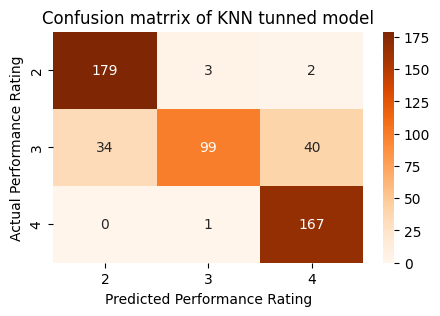

In [559]:
# generating a confusion matrix
c_matrix_knn = confusion_matrix(y_test,y_pred_best_knn, labels=[2,3,4])  # this gives the PerformancingRating in order

# plotting confusion matrix heatmap
plt.figure(figsize =(5,3))
sns.heatmap(c_matrix_knn,annot =True,fmt ='d',cmap = 'Oranges',
            xticklabels=[2,3,4],
            yticklabels=[2,3,4])
plt.xlabel('Predicted Performance Rating')
plt.ylabel('Actual Performance Rating')
plt.title('Confusion matrrix of KNN tunned model')
plt.show()

Confusion matrix interpretation:

- The confusion matrix shows that the tuned KNN model performs very well at correctly identifying employees in Performance Ratings 2 and 4, with minimal misclassifications.

- Class 3, however, shows the highest level of confusion, with the model frequently misclassifying these employees as either rating 2 or 4. This is expected since class 3 lies between the two extreme classes and shares feature similarities with both.

- Overall, the model demonstrates strong predictive accuracy, especially for the extreme categories, but moderate difficulty in identifying mid-level performers.

Makig a predictive model for best_knn model

In [560]:
# creating a list to hold the data
input_data = [40,1,5,2,5,18,1,5,4,4,48,2,3,1,5,1,21,3,20,2,3,18,13,1,12,0]

# Converting the list to a numpy array for easy manipulation by the model
input_data_as_array =  np.asarray(input_data)

# reshaping the numpy array into a 2D as we are using 1D in our data
input_data_reshaped = input_data_as_array.reshape(1,-1)

# Standardizing the input data
Standard_input_data = scaler.transform(input_data_reshaped)
print(Standard_input_data)

# fitting the standardized input data into the model
predictions = best_knn.predict(Standard_input_data)

# calling the predict value
print("\nThis is the target:", predictions)

if predictions[0] == 2:
    print("The employee demonstrates a low performance rating.")
elif predictions[0] == 3:
    print("The employee demonstrates an average performance rating.")
else:
    print("The employee demonstrates a high performance rating.")


[[ 0.4030739   0.73460709  0.77484239  0.87577978  1.06992752  0.8266955
  -1.26989975 -0.4667663   1.12596958  1.31345653 -0.89283848 -1.32145909
   1.00720707 -1.60355596  1.46551395  2.26529886  1.12216984  0.20620066
   1.69223934 -0.68149314  0.27153893  2.800596    2.85820418 -0.26205137
   2.5070494  -0.31013546]]

This is the target: [4]
The employee demonstrates a high performance rating.


Models Evalution using ROC-AUC(Receiever Operating characteristsics-Area under curve)

- Since the dataset is imbalanced, accuracy score alone might be misleading. Therefore ROC-AUC will be performed on the three models and comparison will be done.

In [561]:
# importing the necessary library
from sklearn.metrics import roc_auc_score, roc_curve

ROC-AUC for SVM model

In [562]:
#predicting probabilities for the SVM tunned model
y_probs= best_model.predict_proba(X_test_standardized)

#  computing  average ROC-AUC
roc_auc_ovr = roc_auc_score(y_test, y_probs, multi_class='ovr', average='macro')
roc_auc_ovo = roc_auc_score(y_test, y_probs, multi_class='ovo', average='macro')

print(f"\nMacro-average ROC-AUC (One-vs-Rest): {roc_auc_ovr:.4f}")
print(f"Macro-average ROC-AUC (One-vs-One): {roc_auc_ovo:.4f}")



Macro-average ROC-AUC (One-vs-Rest): 0.9818
Macro-average ROC-AUC (One-vs-One): 0.9822


ROC-AUC Interpretation:

1. One-vs-Rest (0.9818):

- The model can identify each performance category (2, 3, 4) with 98.18% accuracy when distinguishing it from all other categories combined.

2. One-vs-One (0.9822):

- The model can distinguish between any two performance categories with 98.22% accuracy.

The high and consistent scores between OvR and OvO suggest minimal misclassification, employees are unlikely to be placed in the wrong performance bracket.

ROC-AUC for RandomRoest model

In [563]:
#predicting probabilities for the initial RandomForest model
y_probs_rf= m_random_classifier.predict_proba(X_test)

#  computing  average ROC-AUC
roc_auc_ovr = roc_auc_score(y_test, y_probs_rf, multi_class='ovr', average='macro')
roc_auc_ovo = roc_auc_score(y_test, y_probs_rf, multi_class='ovo', average='macro')

print(f"\nMacro-average ROC-AUC (One-vs-Rest): {roc_auc_ovr:.4f}")
print(f"Macro-average ROC-AUC (One-vs-One): {roc_auc_ovo:.4f}")


Macro-average ROC-AUC (One-vs-Rest): 0.9949
Macro-average ROC-AUC (One-vs-One): 0.9949


ROC-AUC Interpretation:

1. One-vs-Rest (0.9949):

- The model can identify each performance category (2, 3, 4) with 99.49% accuracy when distinguishing it from all other categories combined.

2. One-vs-One (0.9822):

- The model can distinguish between any two performance categories with 99.49% accuracy.

The identical scores (0.9949 for both OvR and OvO) indicate; all three classes are equally well-separated,no pair of classes is harder to distinguish than any other. The model has no specific weaknesses in any classification task.

ROC-AUC for KNN tunned model

In [564]:
#predicting probabilities for the initial RandomForest model
y_probs_rf= best_knn.predict_proba(X_test_standardized)

#  computing  average ROC-AUC
roc_auc_ovr = roc_auc_score(y_test, y_probs_rf, multi_class='ovr', average='macro')
roc_auc_ovo = roc_auc_score(y_test, y_probs_rf, multi_class='ovo', average='macro')

print(f"\nMacro-average ROC-AUC (One-vs-Rest): {roc_auc_ovr:.4f}")
print(f"Macro-average ROC-AUC (One-vs-One): {roc_auc_ovo:.4f}")


Macro-average ROC-AUC (One-vs-Rest): 0.8851
Macro-average ROC-AUC (One-vs-One): 0.8848


ROC-AUC Interpretation:

1. One-vs-Rest (0.8851):

- The model can identify each performance category (2, 3, 4) with 88.51% accuracy when distinguishing it from all other categories combined.

2. One-vs-One (0.8848):

- The model can distinguish between any two performance categories with 88.48% accuracy.

The nearly identical scores (0.8851 vs 0.8848) indicate; all classification tasks are equally challenging for this model, no specific pair of classes is disproportionately hard to separate.

Computing Perfromance metrics and selecting the best model


In [565]:
# computing the metrics for each model together

SVM_metrics = {'accuracy':0.89, 'ROC-AUC_OvR':0.9818, 'ROC-AUC_OvO':0.9822}
RandomForest_metrics = {'accuracy':0.95,  'ROC-AUC_OvR':0.9949, 'ROC-AUC_OvO':0.9949}
KNN_metrics ={'accuracy':0.84, 'ROC-AUC_OvR':0.8851, 'ROC-AUC_OvO':0.8848}


In [566]:
# combinining the metrics into a dictionary
all_metrics = {'Support Vector Machine':SVM_metrics,
               'RandomForest': RandomForest_metrics,
               'KNN':KNN_metrics}

In [567]:
# converting the dictionary into a pandas dataframe
employeedata_metrics = pd.DataFrame(all_metrics).T  #--> t(transpose to have all the models as rows)
print(employeedata_metrics)

                        accuracy  ROC-AUC_OvR  ROC-AUC_OvO
Support Vector Machine      0.89       0.9818       0.9822
RandomForest                0.95       0.9949       0.9949
KNN                         0.84       0.8851       0.8848


Overall interpretation on the models metrics:

Based on the evaluation metrics, RandomForestClassifier is the best-performing model for predicting employee performance rating. It achieves the highest accuracy (95%), ROC-AUC_OvR and ROC-AUC_OvO (99.49%), indicating it reliably identifies employees performance based on the different levels of rating. 

- Therefore, Random Forest Classifier is selected as the final model for this task.

Identifying Important Features selected for analysis

- Since the Random Forest Classifier was selected as the final model, feature importance was computed using the model’s built-in Gini importance scores. 

- Random Forest naturally ranks features based on how much they reduce impurity across all decision trees.

In [568]:

# computing random forest feature importance(Gini importance)
feature_importance = pd.DataFrame({
    'feature': X_resampled.columns,
    'importances': m_random_classifier.feature_importances_
}). sort_values(by='importances', ascending=False)

print(feature_importance)


                         feature  importances
9     EmpEnvironmentSatisfaction     0.236297
16      EmpLastSalaryHikePercent     0.227156
23       YearsSinceLastPromotion     0.083985
22  ExperienceYearsInCurrentRole     0.039946
5                     EmpJobRole     0.038120
10                 EmpHourlyRate     0.034657
4                  EmpDepartment     0.027767
7               DistanceFromHome     0.026657
21  ExperienceYearsAtThisCompany     0.026190
20            EmpWorkLifeBalance     0.025837
0                            Age     0.024174
15                      OverTime     0.022307
24          YearsWithCurrManager     0.022074
18    TotalWorkExperienceInYears     0.021767
14            NumCompaniesWorked     0.021697
2            EducationBackground     0.015608
13            EmpJobSatisfaction     0.014325
8              EmpEducationLevel     0.014064
3                  MaritalStatus     0.012052
12                   EmpJobLevel     0.011777
11             EmpJobInvolvement  

Feature Impotance(Gini Importance) Interpretation:

It is evident that the most influential features in predicting employee performance are EmpEnvironmentSatisfaction and EmpLastSalaryHikePercent, contributing 23.6% and 22.7% of the total importance respectively.

Features that contribute with mid-level importance include (YearsSinceLastPromotion (8.4%), ExperienceYearsInCurrentRole (3.9%), EmpJobRole (3.8%)).


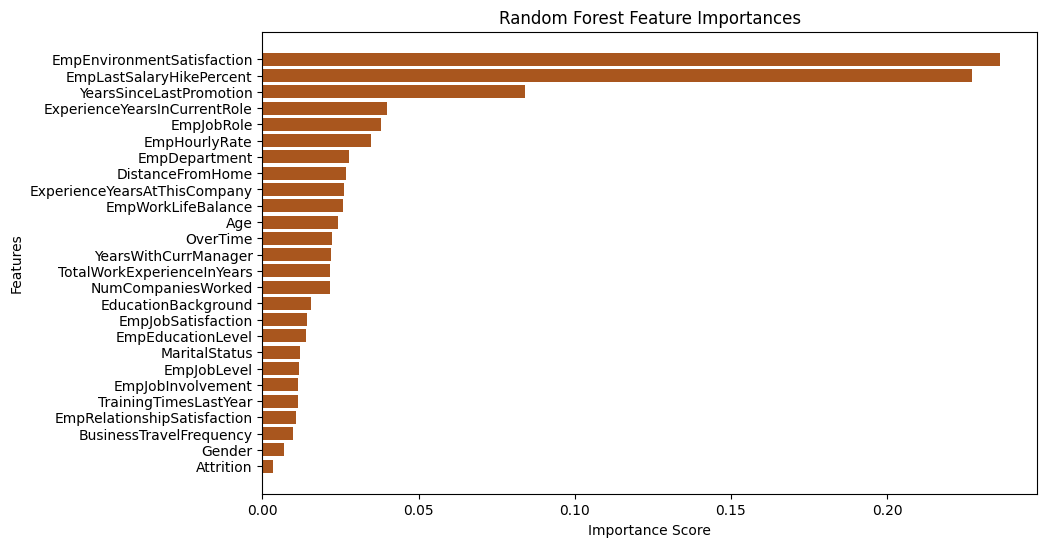

In [569]:
# plotting the feature imporatances (Horizontal Bar plot)

plt.figure(figsize=(10, 6))
plt.barh(feature_importance['feature'], feature_importance['importances'], color='#A9561E')
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.title("Random Forest Feature Importances")
plt.gca().invert_yaxis()  # largest on top
plt.show()

Interpretation on Random Forest feature importance:

- Using the Random Forest Classifier’s Gini importance method, the most influential features in predicting employee performance were EmpEnvironmentSatisfaction and EmpLastSalaryHikePercent, contributing 23.6% and 22.7% of the total importance respectively. 

- These features are critical because employees who are satisfied with their work environment and those who recently received higher salary increases tend to demonstrate higher motivation and stronger performance. 

- Other key predictors included YearsSinceLastPromotion, ExperienceYearsInCurrentRole, and EmpJobRole, which capture employees’ experience, role familiarity, and career progression, all factors strongly linked to performance.

- Features such as Gender, Attrition, and BusinessTravelFrequency had very low importance scores, indicating minimal contribution to performance prediction.

Selected Model:

Based on ROC-AUC as the primary evaluation metric; Random Forest Classifier was selected as the most suitable model for this task. This is due to its superior performance compared to the other models (SVM and KNN) that were also evaluated.

Unlike accuracy, ROC-AUC is able to evaluate a model’s ability to correctly distinguish between classes across all possible classification thresholds. ROC-AUC was therefore, chosen as appropriate metric for selecting the model that can generalize well to minority classes, which is critical for employee performance prediction. The Random Forest Classifier consistently achieved the highest ROC-AUC score, confirming its effectiveness for this classification task.

Saving the Random forest Classifier model to file

In [570]:
# saving model to file

#importing the pickle dependency
import pickle as pkl

with open ('m_random_classifier.pkl', 'wb') as file:
    pkl.dump(m_random_classifier,file)

print("Model has been trained and saved as 'm_random_classifier.pkl'")

Model has been trained and saved as 'm_random_classifier.pkl'


In [571]:
# saving  overtime Label encoder as file
with open('Over_encoder.pkl', 'wb') as file:
    pkl.dump(Over_encoder,file)

# saving attrition label encoder as file1
with open('Att_encoder.pkl', 'wb') as file1:
    pkl.dump(Att_encoder,file1)

CONCLUSION AND RECOMMENDATIONS

Conclusion

In conclusion, using ROC-AUC as the primary evaluation metric was appropriate for this dataset due to the imbalanced nature of performance rating classes. Random Forest Classifier emerged as the best performing model based on the ROC-AUC scores. However, its higher training performance indicates potential overfitting. Therefore, for real-world deployment, cross-validation or alternative models with lower variance can be put into consideration. 

From this project, EmpEnvironmentSatisfaction and EmpLastSalaryHikePercent were the strongest and most actionable predictors of employee performance. These insights obtained are able to provide clear direction for HR interventions that is aimed at improving employee performance.


Recommendations

In order to achieve the improvement of employee performance, the company needs to focus on:
1. Improving work place environment, more focus to be on the employee environment satisfaction
2. Reviewing salary hike polices, this will give a boost to the employees to perform well
3. Shorten promotion cycles and create clear career pathways. This can be achieved by reducing year since last promotion to months.
4. Incorporate role specific training and mentoring. This ensures employee's effectiveness in their current role is adequately achieved.
5. Ensure overtime is monitored and promotion of work-life balance. This help reduce excessive overtime that is harming sustained performance.
6. The company should put more focus on development and sales department as they have an overall high performance compared to the rest of the departments.



Future Work 

1.	Improve hyperparameter tunning with stratified K-folds cross validation. Since the tunned accuracy for Random Forest reduced compared to the initial model accuracy.

2.	Evaluate alternative algorithms that are less prone to overfitting such as XGBoost or Regularized Logistic Regression as a baseline.


3.	Apply advance class imbalance techniques such as undersampling or class-weights adjustments.


4.	Explore dimensionality reduction methods such as PCA (Principal component analysis).
